In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

C:\Users\marie\AppData\Local\Temp\ipykernel_9132\1934101123.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [57]:
df = pd.read_csv('data/book_sales.csv')

In [58]:

df.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [59]:
dfp = df.drop(['Hardcover'], axis=1)

In [60]:
dfp.head()

,Date,Paperback
0,2000-04-01,199
1,2000-04-02,172
2,2000-04-03,111
3,2000-04-04,209
4,2000-04-05,161


In [61]:
dfp['Time'] = np.arange(len(dfp.index))
dfp.head()

,Date,Paperback,Time
0,2000-04-01,199,0
1,2000-04-02,172,1
2,2000-04-03,111,2
3,2000-04-04,209,3
4,2000-04-05,161,4


Text(0.5, 1.0, 'Time Plot of Paperback Sales')

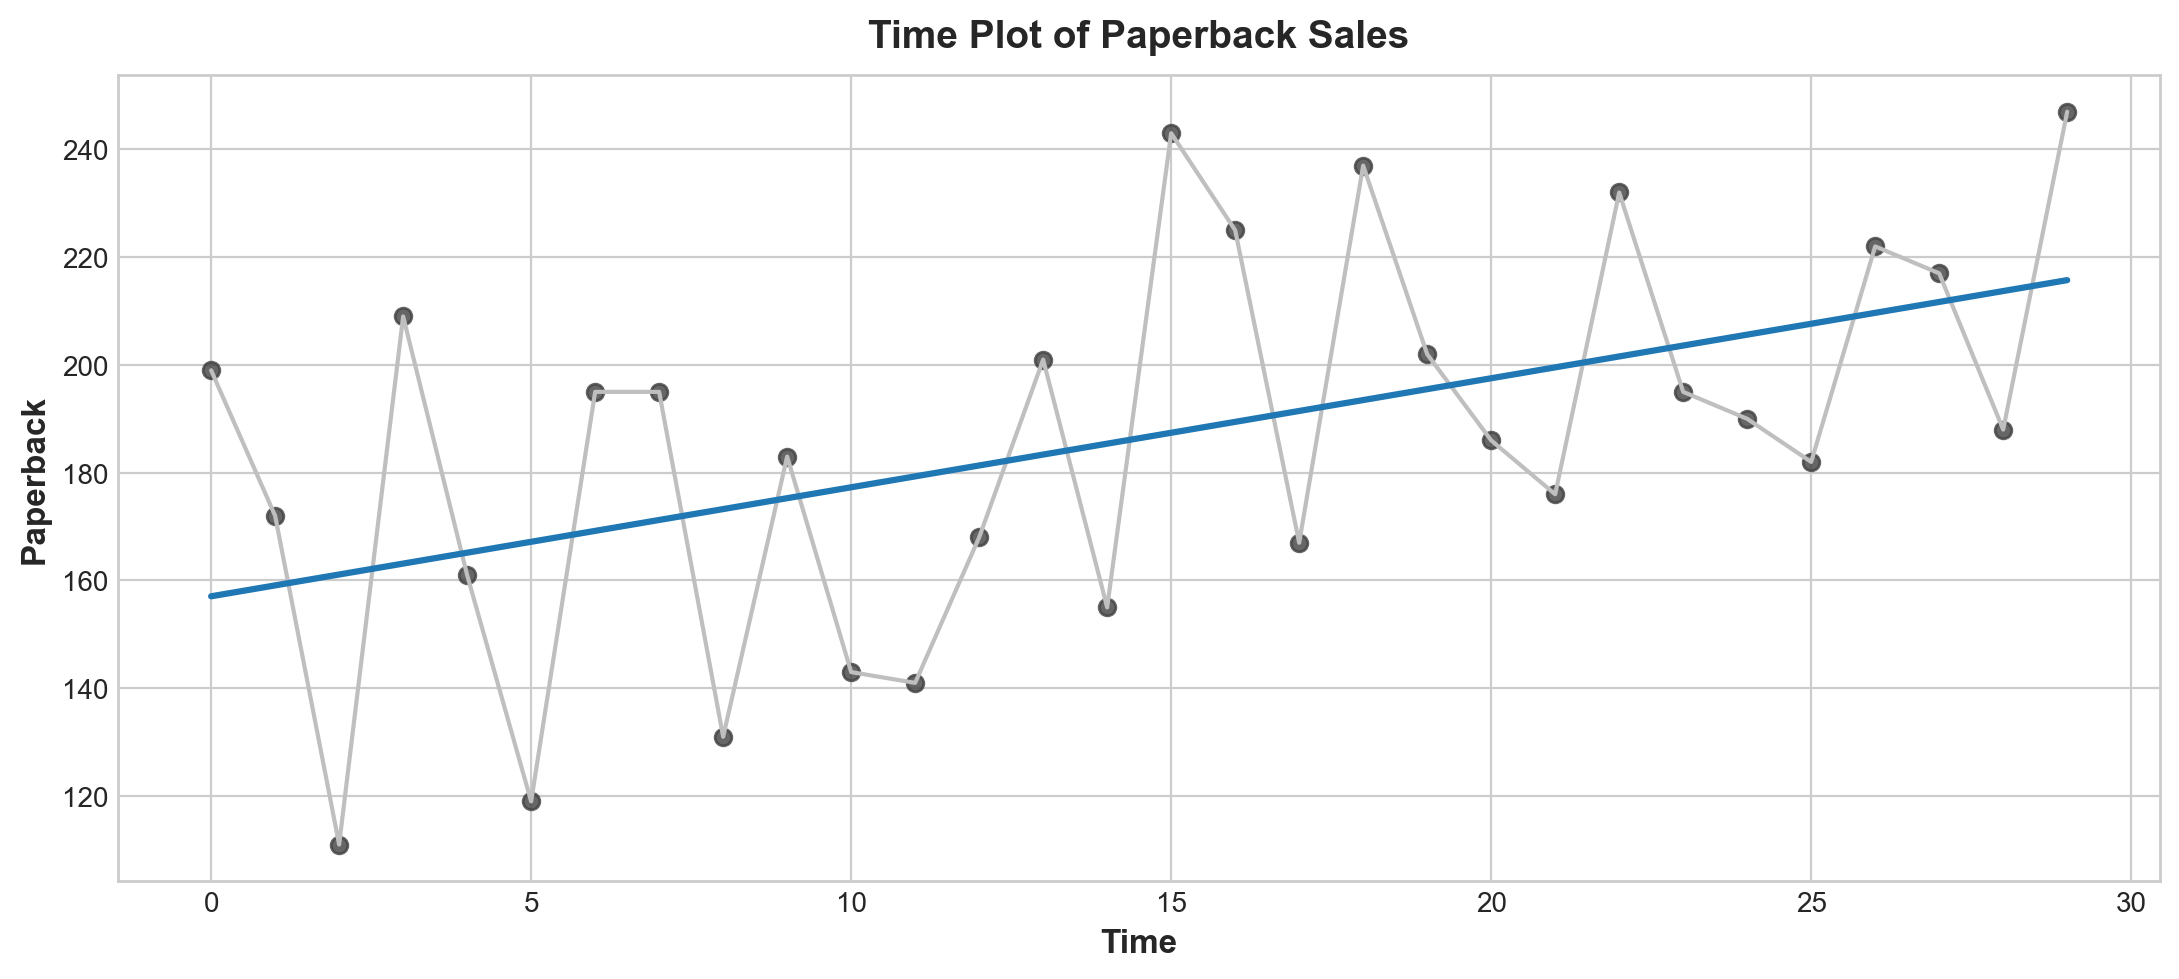

In [62]:
fig, ax = plt.subplots()
ax.plot('Time', 'Paperback', data=dfp, color='0.75')
ax = sns.regplot(x='Time', y='Paperback', data=dfp, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Paperback Sales')

In [63]:
dfh = df.drop(['Paperback'], axis=1)
dfh = dfh.set_index('Date')
dfh.head()


,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [64]:
dfh['lag'] = dfh['Hardcover'].shift(1)
dfh = dfh.reindex(columns=['Hardcover','lag'])
dfh.head()

,Hardcover,lag
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

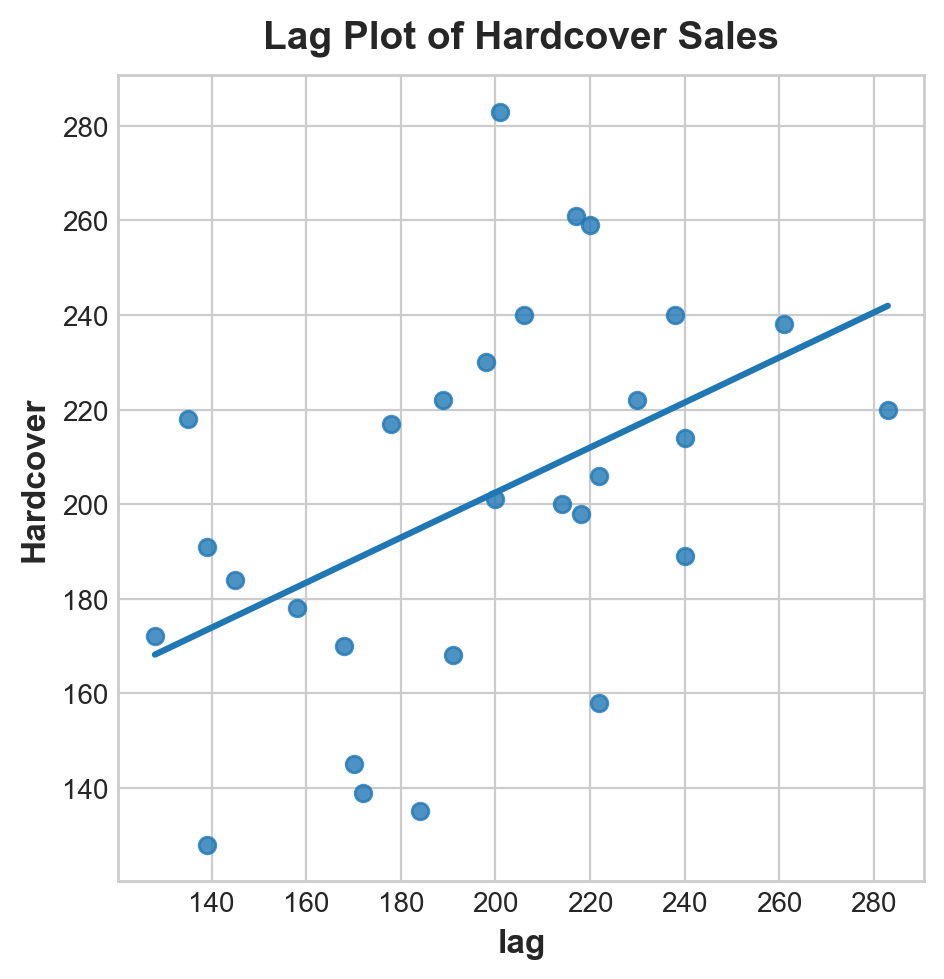

In [65]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag', y='Hardcover', data=dfh, ci = None)
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

In [66]:
dfp = dfp.set_index('Date')
dfp.head()

,Paperback,Time
Date,,
2000-04-01,199,0
2000-04-02,172,1
2000-04-03,111,2
2000-04-04,209,3
2000-04-05,161,4


In [67]:
x = dfp.loc[:, ['Time']]
y = dfp.loc[:, 'Paperback']
model = LinearRegression()
model.fit(x, y)
ypred = pd.Series(model.predict(x), index = dfp.index) # линия регрессии

In [68]:
ypred.head()

Date
2000-04-01    157.064516
2000-04-02    159.087653
2000-04-03    161.110790
2000-04-04    163.133927
2000-04-05    165.157063
dtype: float64

In [69]:
#дает значение коэффициента детерминации R-squared
model.fit(x, y).score(x, y)

0.25198325575699443

In [70]:
#дает значение коэффициентов уравнения регрессии
model.fit(x, y).coef_

array([2.02313682])

In [71]:
#дает значение константы
model.fit(x,y).intercept_

157.06451612903228

так уравнение регрессии будет выглядеть:
y' = 157 + 2*x

Text(0.5, 1.0, 'Time Plot of Paperback books sales')

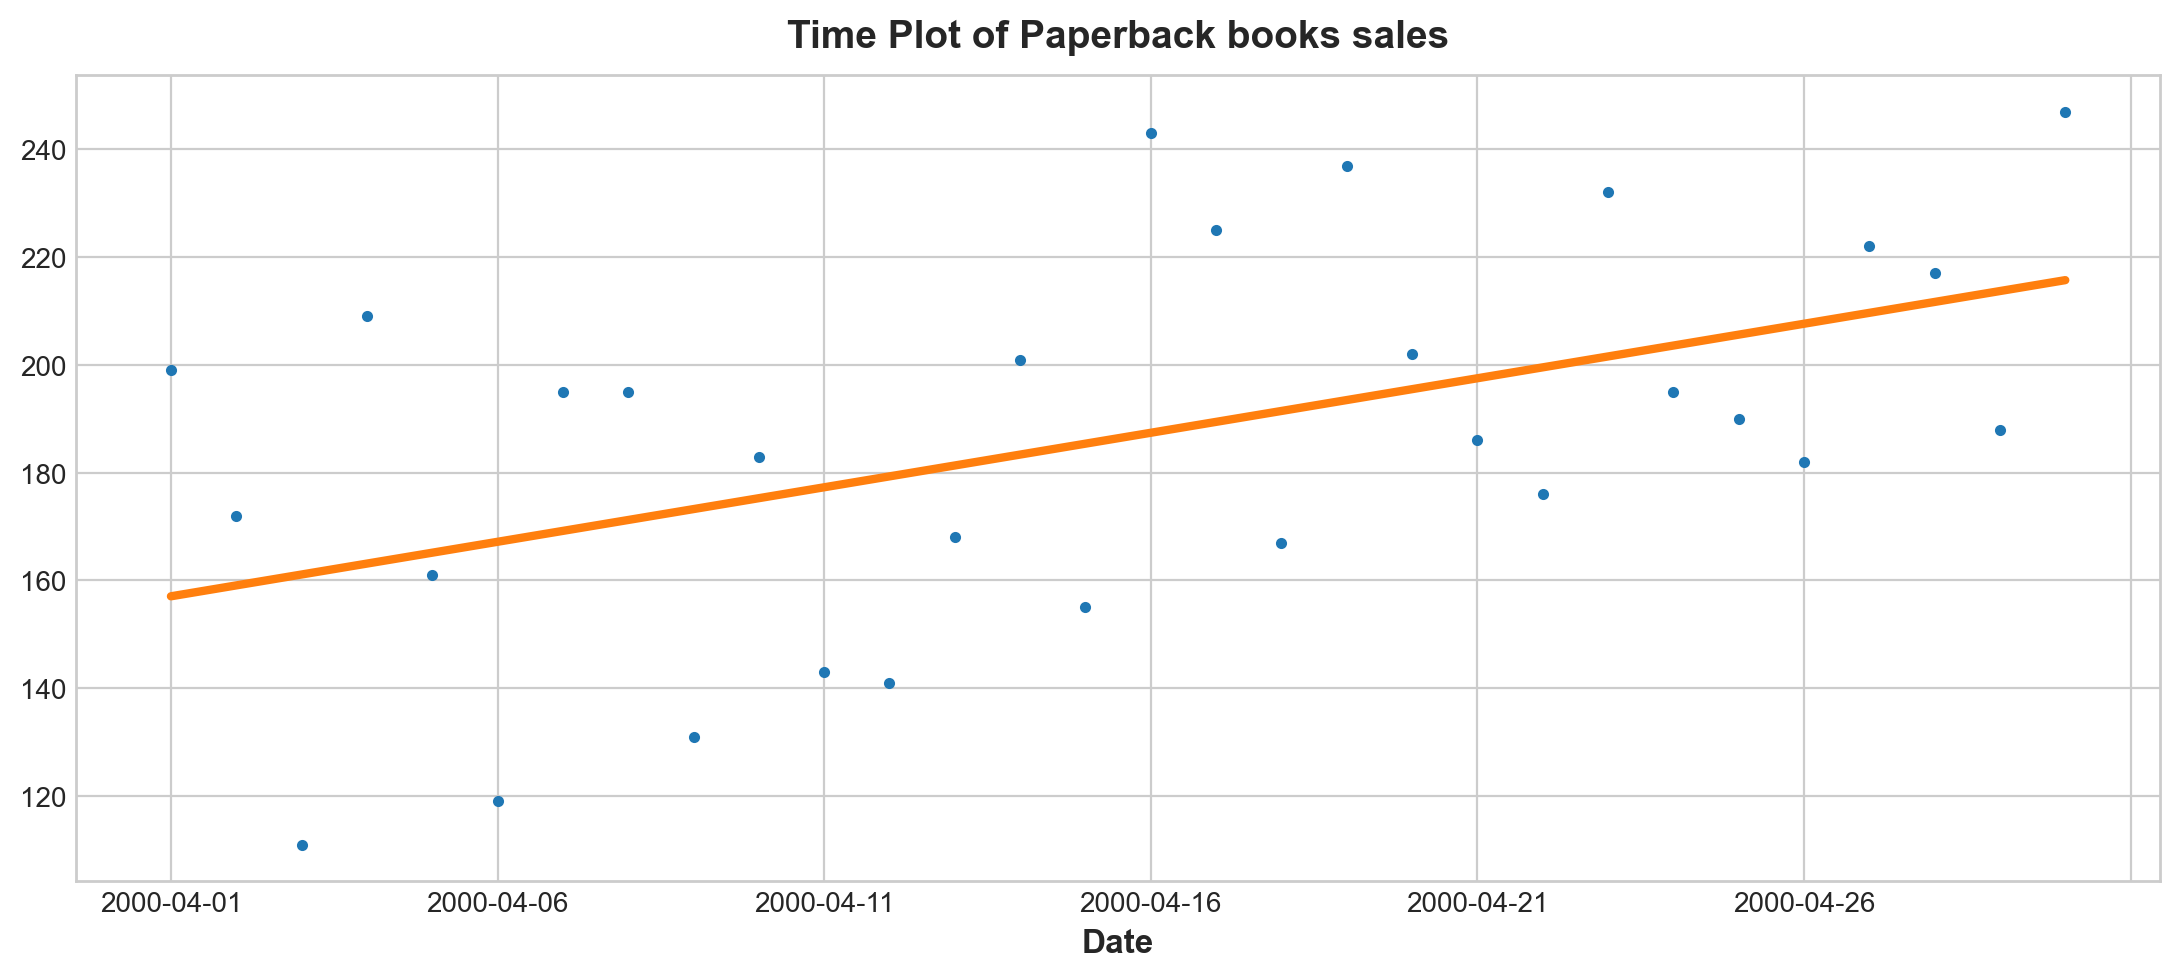

In [74]:
ax = y.plot(style='.')
ax = ypred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Paperback books sales')

In [75]:
dfh.head()

,Hardcover,lag
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


In [76]:
x = dfh.loc[:,['lag']]
x.dropna(inplace=True)
y = dfh.loc[:, 'Hardcover']
y, x = y.align(x, join = 'inner')
model = LinearRegression()
model.fit(x, y)
ypred = pd.Series(model.predict(x), index = x.index)

Text(0.5, 1.0, 'Lag Plot of Hardcover books')

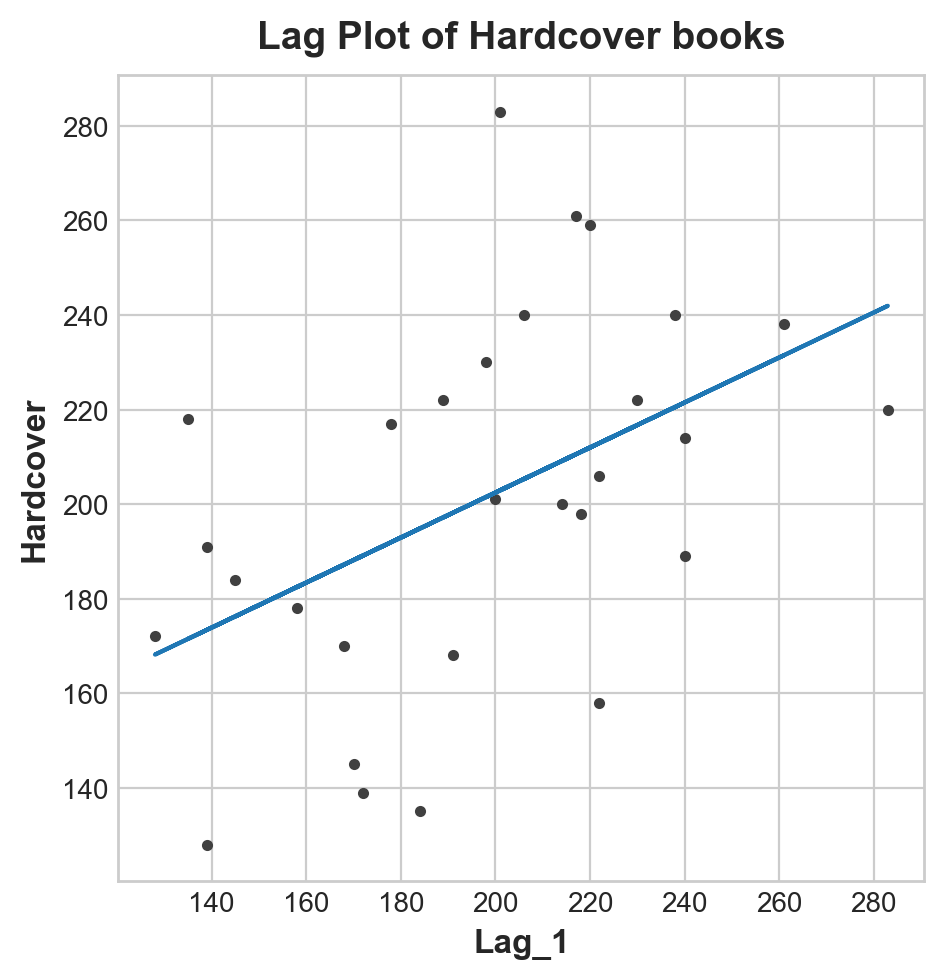

In [77]:
fig, ax = plt.subplots()
ax.plot(x['lag'], y, '.', color='0.25')
ax.plot(x['lag'], ypred)
ax.set_aspect('equal')
ax.set_ylabel('Hardcover')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Hardcover books')

Moving average. A moving average plot is used to discover trend. 

In [92]:
df = pd.read_csv('data/tunnel.csv', parse_dates=['Day'])
df = df.set_index('Day').to_period()
df.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [93]:
moving_average = df.rolling(window = 365, center= True, min_periods=183).mean()

<Axes: title={'center': 'Moving average plot'}, xlabel='Day'>

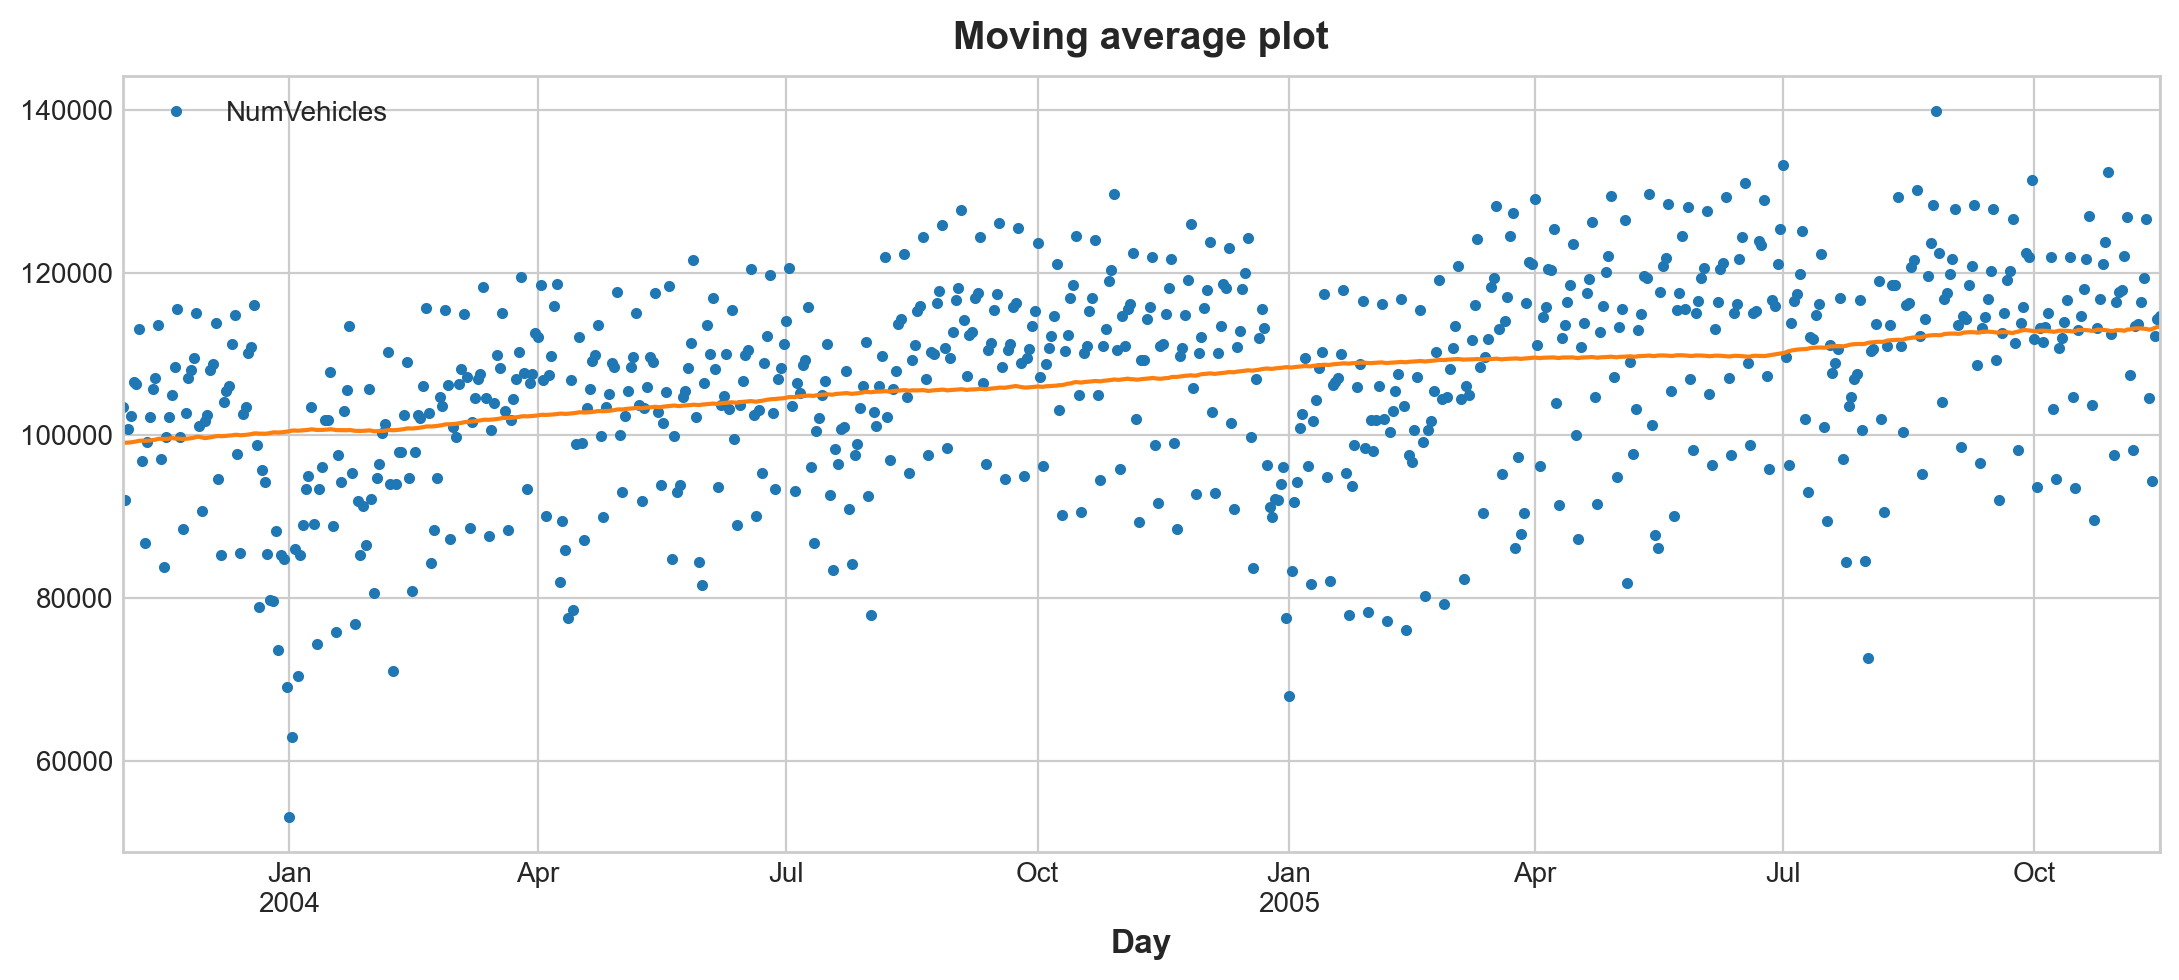

In [94]:
ax = df.plot(style='.')
moving_average.plot(ax=ax, title='Moving average plot', legend=False)


Get time dummy

In [95]:
# index - dates from training data, constant - dummy feature for bias (y_intercept), order - polynomial order (2 - quadratic, 3 - cubic), 
# drop - drop terms if necessary to avoid collinearity
 
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(index = df.index, constant=True, order = 1, drop=True)
x = dp.in_sample()
x.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [96]:
y = df['NumVehicles']
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
y_pred = pd.Series(model.predict(x), index = x.index)

<Axes: title={'center': 'NumVehicles linear regression plot'}, xlabel='Day'>

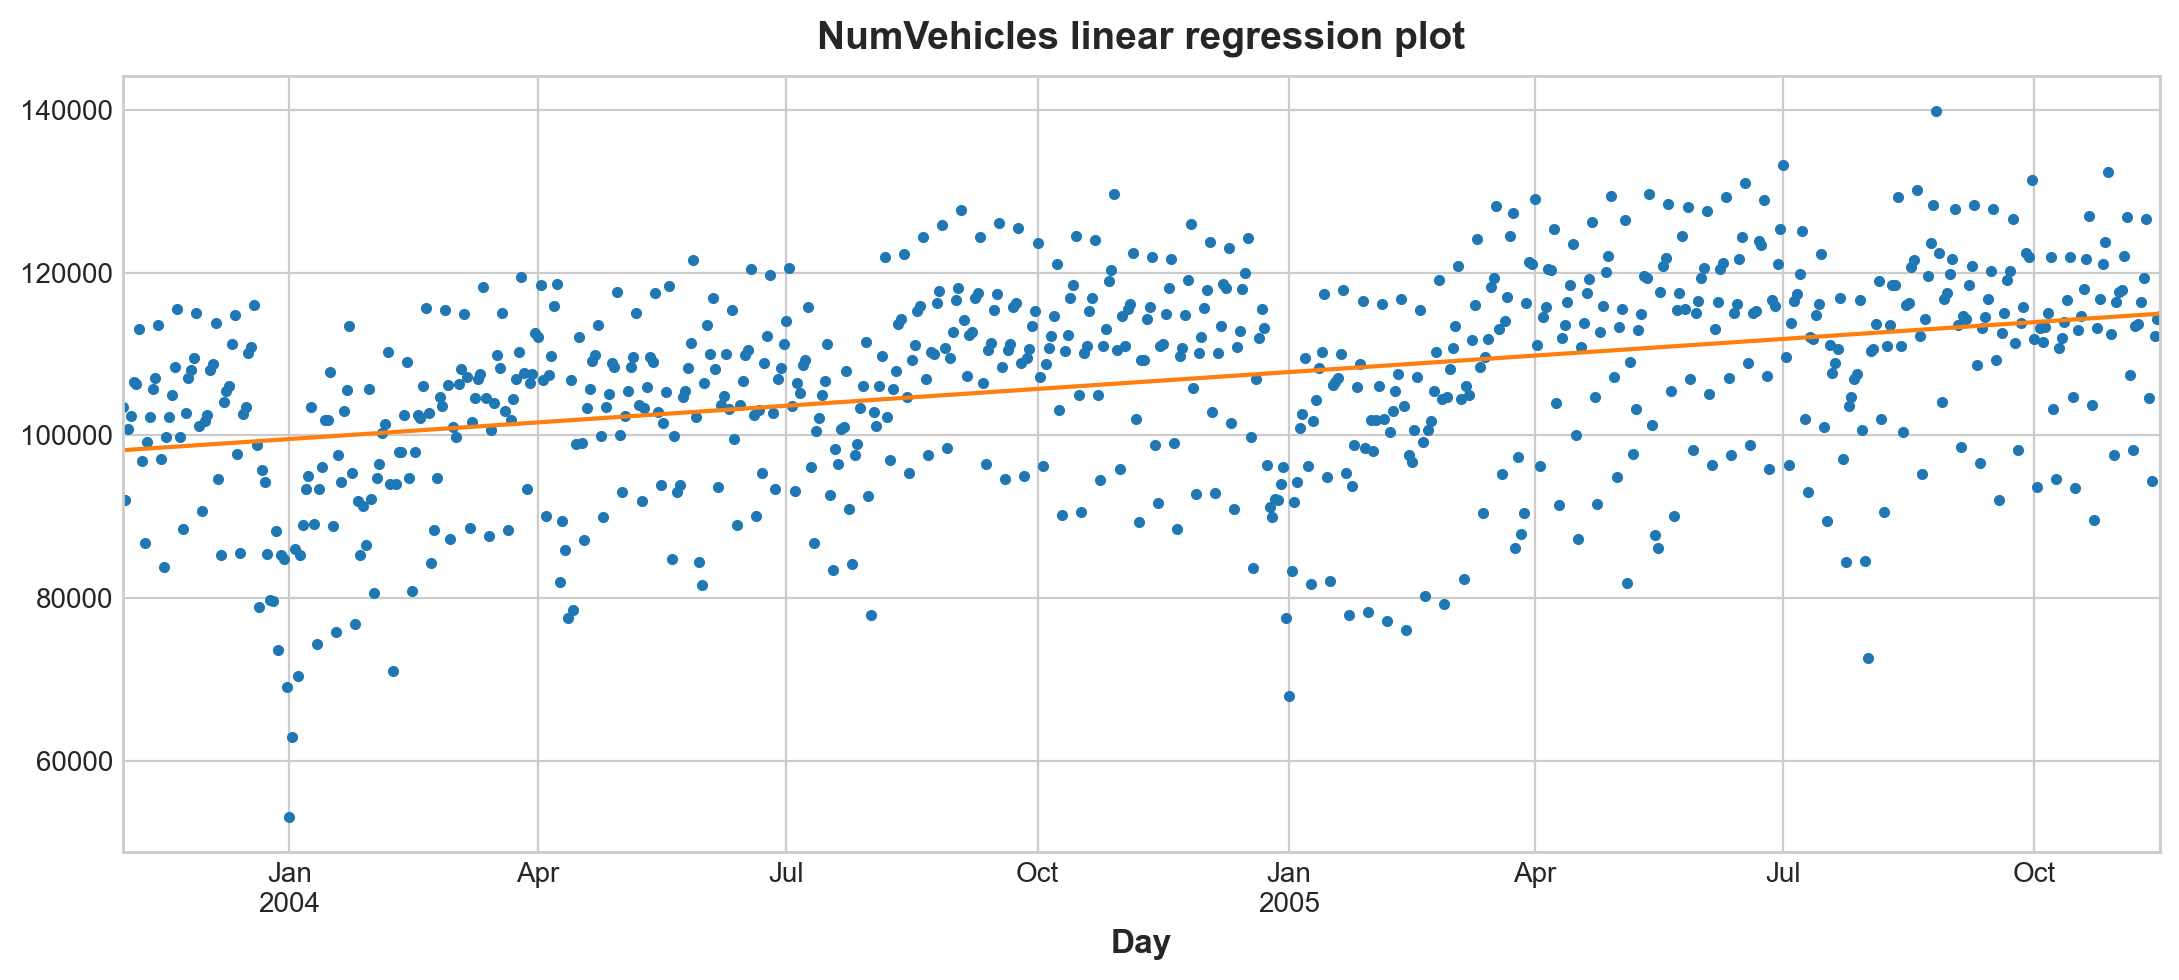

In [97]:
ax = df.plot(style='.', legend=False)
y_pred.plot(ax=ax, title = 'NumVehicles linear regression plot', legend=False)

To make a forecast, we apply our model to "out of sample" features. "Out of sample" refers to times outside of the observation period of the training data. Here's how we could make a 30-day forecast:

In [100]:
x = dp.out_of_sample(steps=30)
y_forecast = pd.Series(model.predict(x), index=x.index)
x.head()

,const,trend
2005-11-17,1.0,748.0
2005-11-18,1.0,749.0
2005-11-19,1.0,750.0
2005-11-20,1.0,751.0
2005-11-21,1.0,752.0


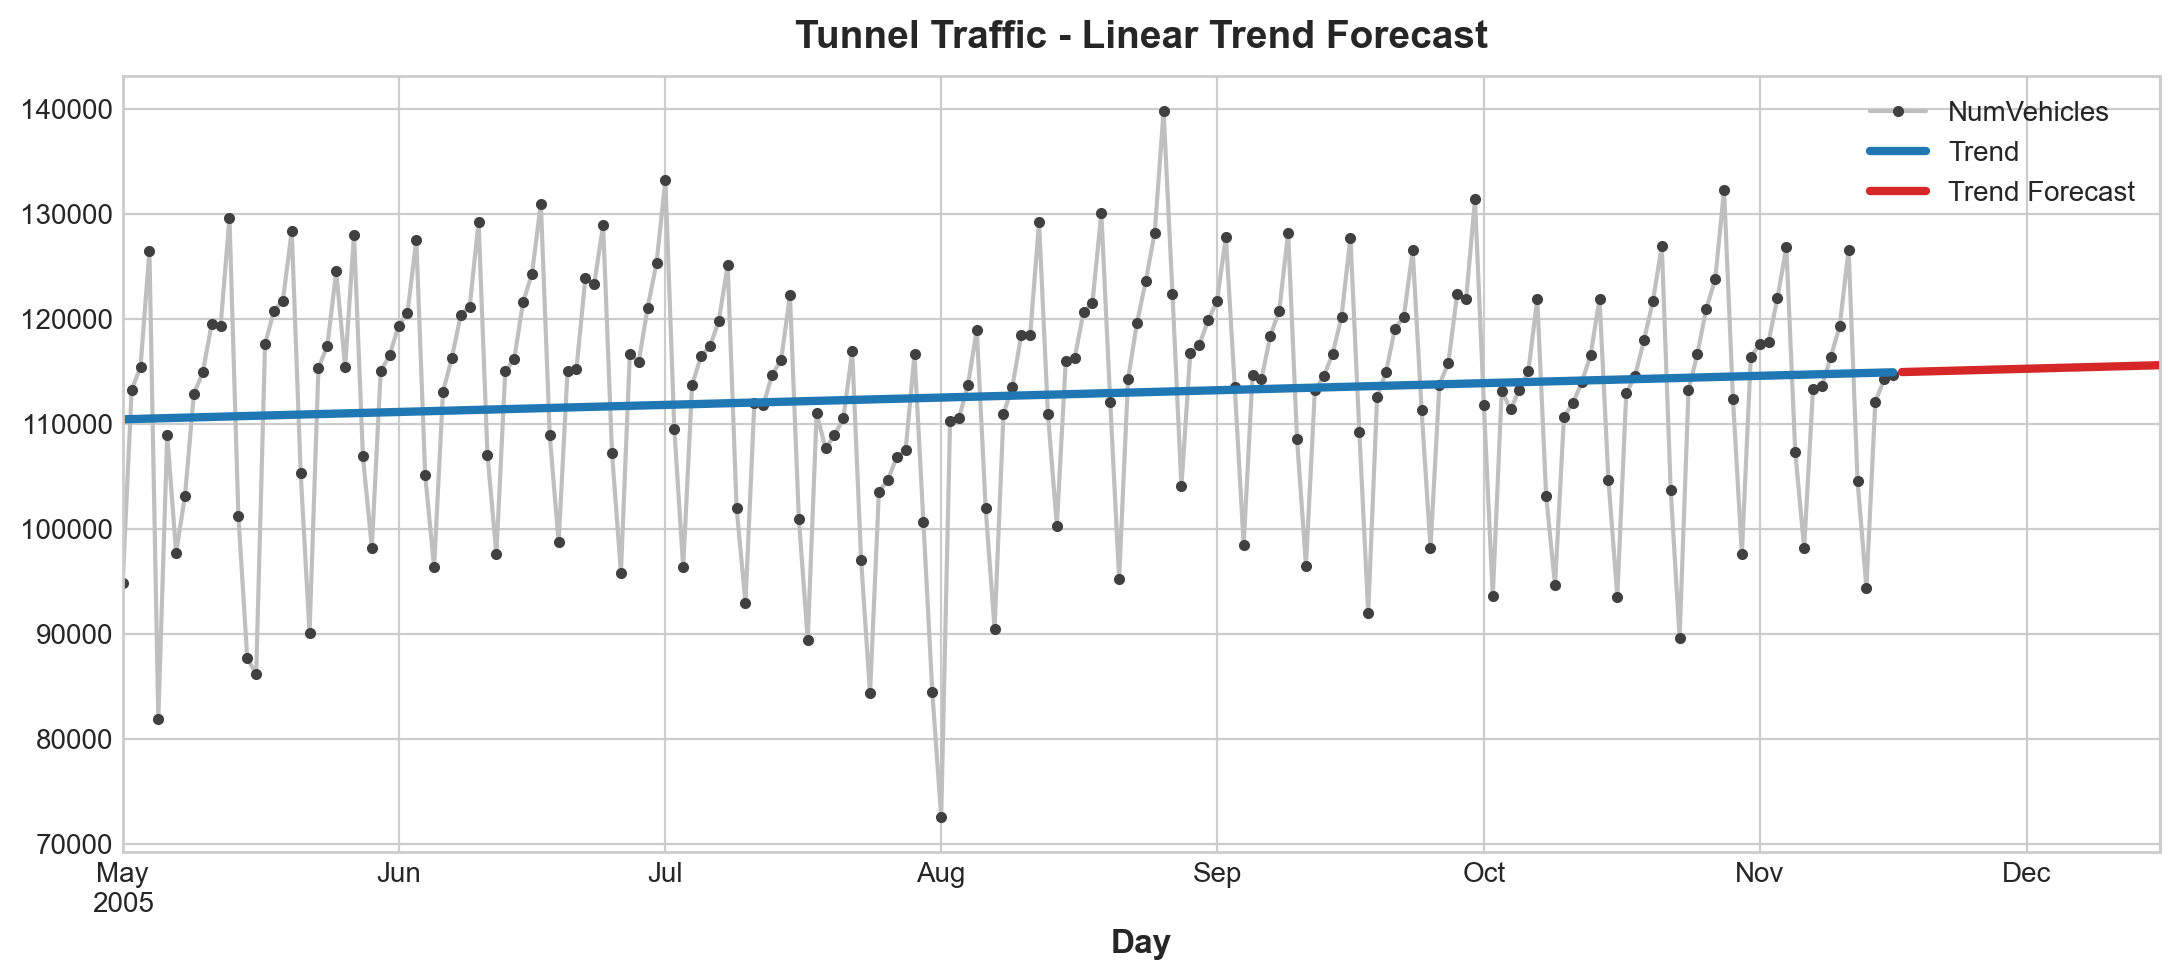

In [99]:
ax = df["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

Seasonality. 
We say that a time series exhibits seasonality whenever there is a regular, periodic change in the mean of the series.

We will learn two kinds of features that model seasonality. The first kind, indicators, is best for a season with few observations, like a weekly season of daily observations. The second kind, Fourier features, is best for a season with many observations, like an annual season of daily observations.

A seasonal plot can be used to discover seasonality.

Seasonal indicators are binary features that represent seasonal differences in the level of a time series. Seasonal indicators are what you get if you treat a seasonal period as a categorical feature and apply one-hot encoding.

By one-hot encoding days of the week, we get weekly seasonal indicators. Creating weekly indicators for the Trigonometry series will then give us six new "dummy" features. (Linear regression works best if you drop one of the indicators; we chose Monday in this case.)
Adding seasonal indicators to the training data helps models distinguish means within a seasonal period. The indicators act as On / Off switches. At any time, at most one of these indicators can have a value of 1 (On). Linear regression learns a baseline value 2379 (constant number) for Mon and then adjusts by the value of whichever indicator is On for that day; the rest are 0 and vanish.

In [105]:
from statsmodels.tsa.deterministic import CalendarFourier
from scipy.signal import periodogram

def seasonal_plot(x, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=x[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=x,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, x[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

df = pd.read_csv("data/tunnel.csv", parse_dates=["Day"])
df = df.set_index("Day").to_period("D")

In [106]:
x = df.copy()

C:\Users\marie\AppData\Local\Temp\ipykernel_9132\3216134433.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
C:\Users\marie\AppData\Local\Temp\ipykernel_9132\3216134433.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


<Axes: title={'center': 'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='NumVehicles'>

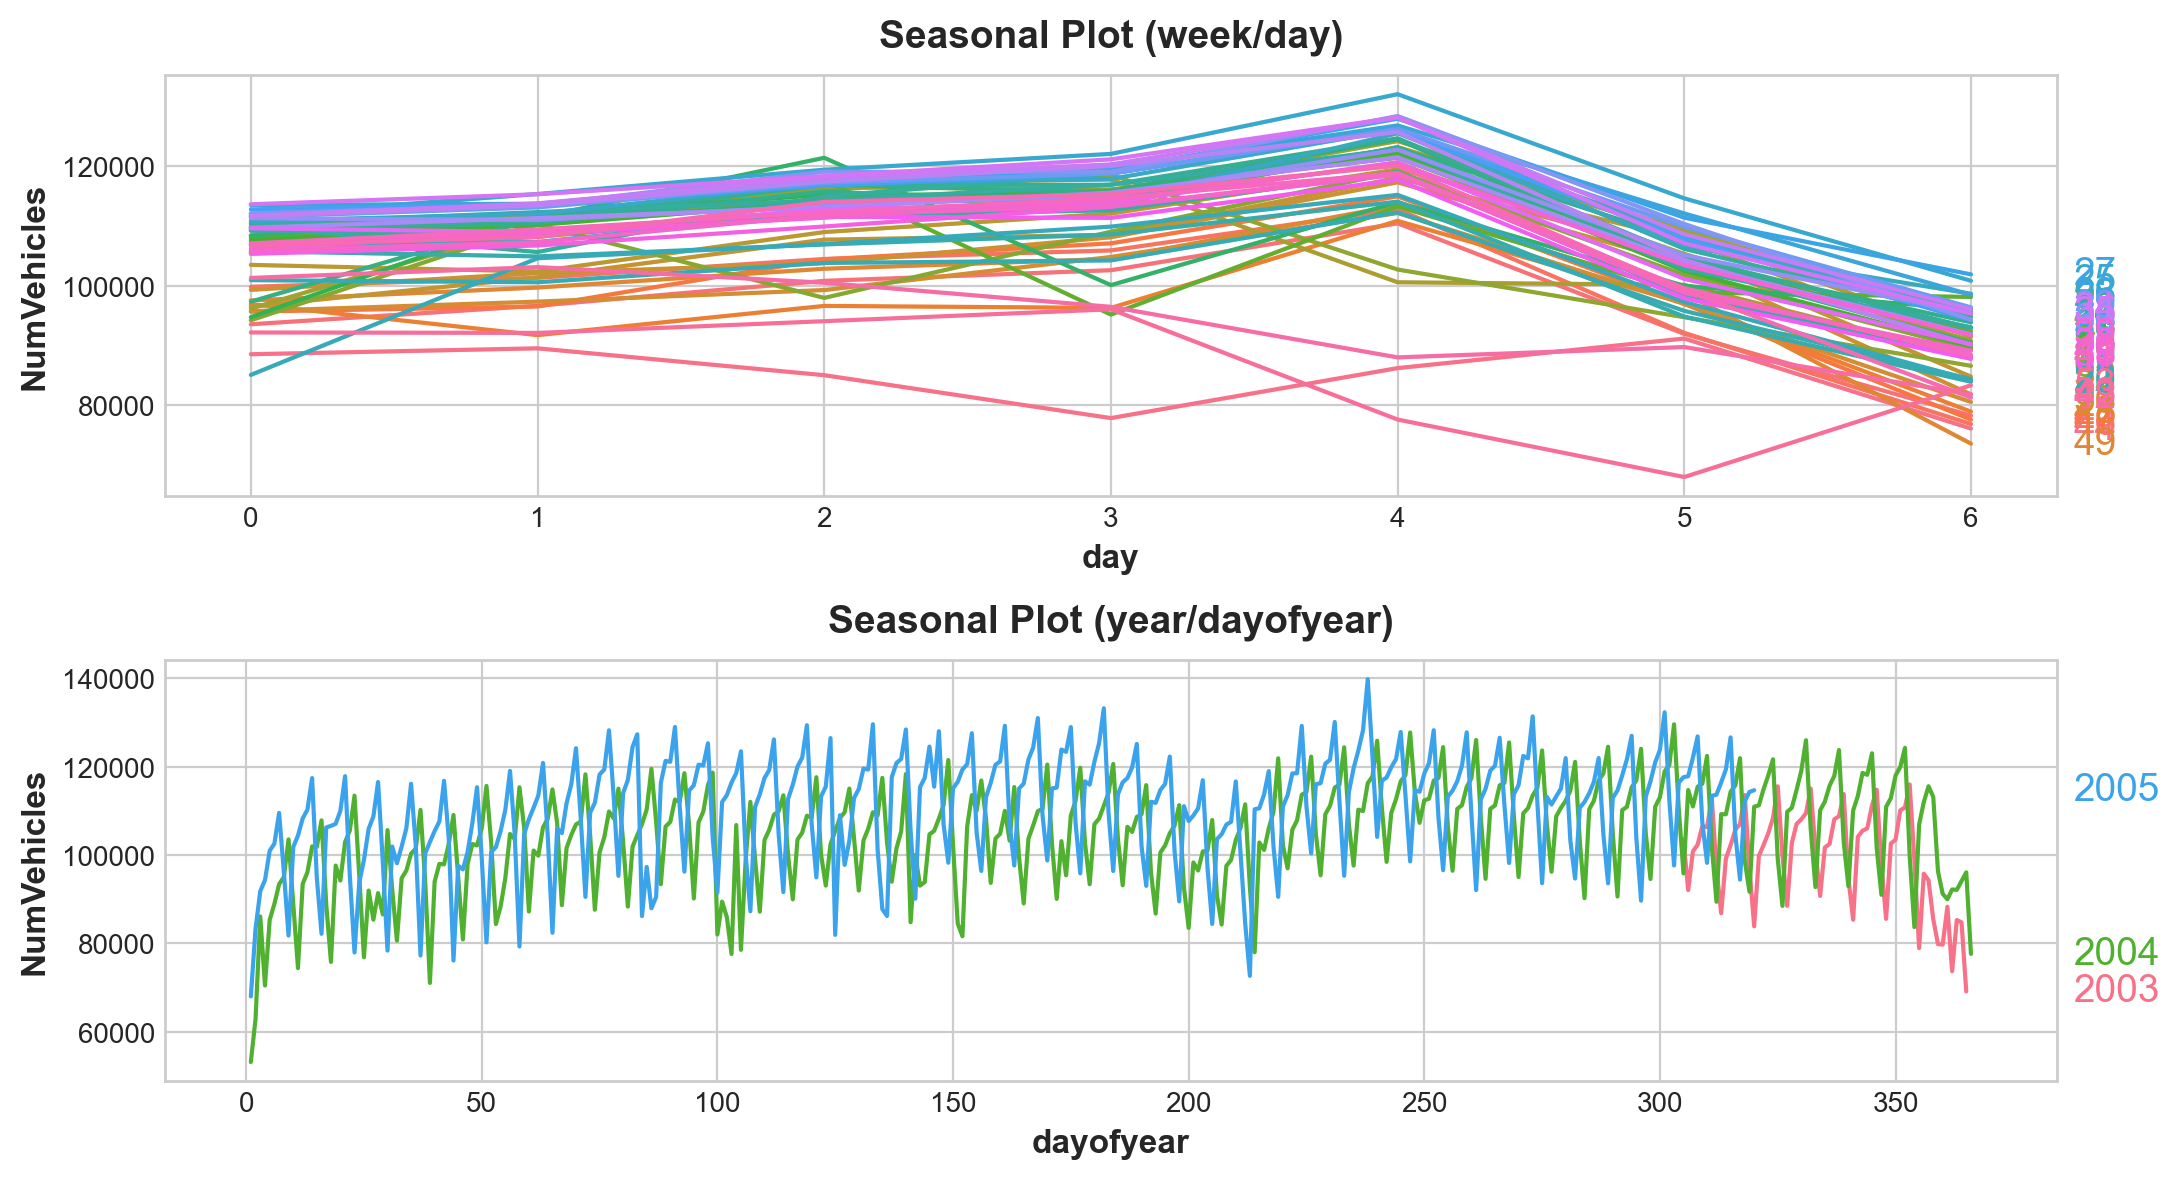

In [107]:
# days within a week
x["day"] = x.index.dayofweek  # the x-axis (freq)
x["week"] = x.index.week  # the seasonal period (period)

# days within a year
x["dayofyear"] = x.index.dayofyear
x["year"] = x.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(x, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(x, y="NumVehicles", period="year", freq="dayofyear", ax=ax1)

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

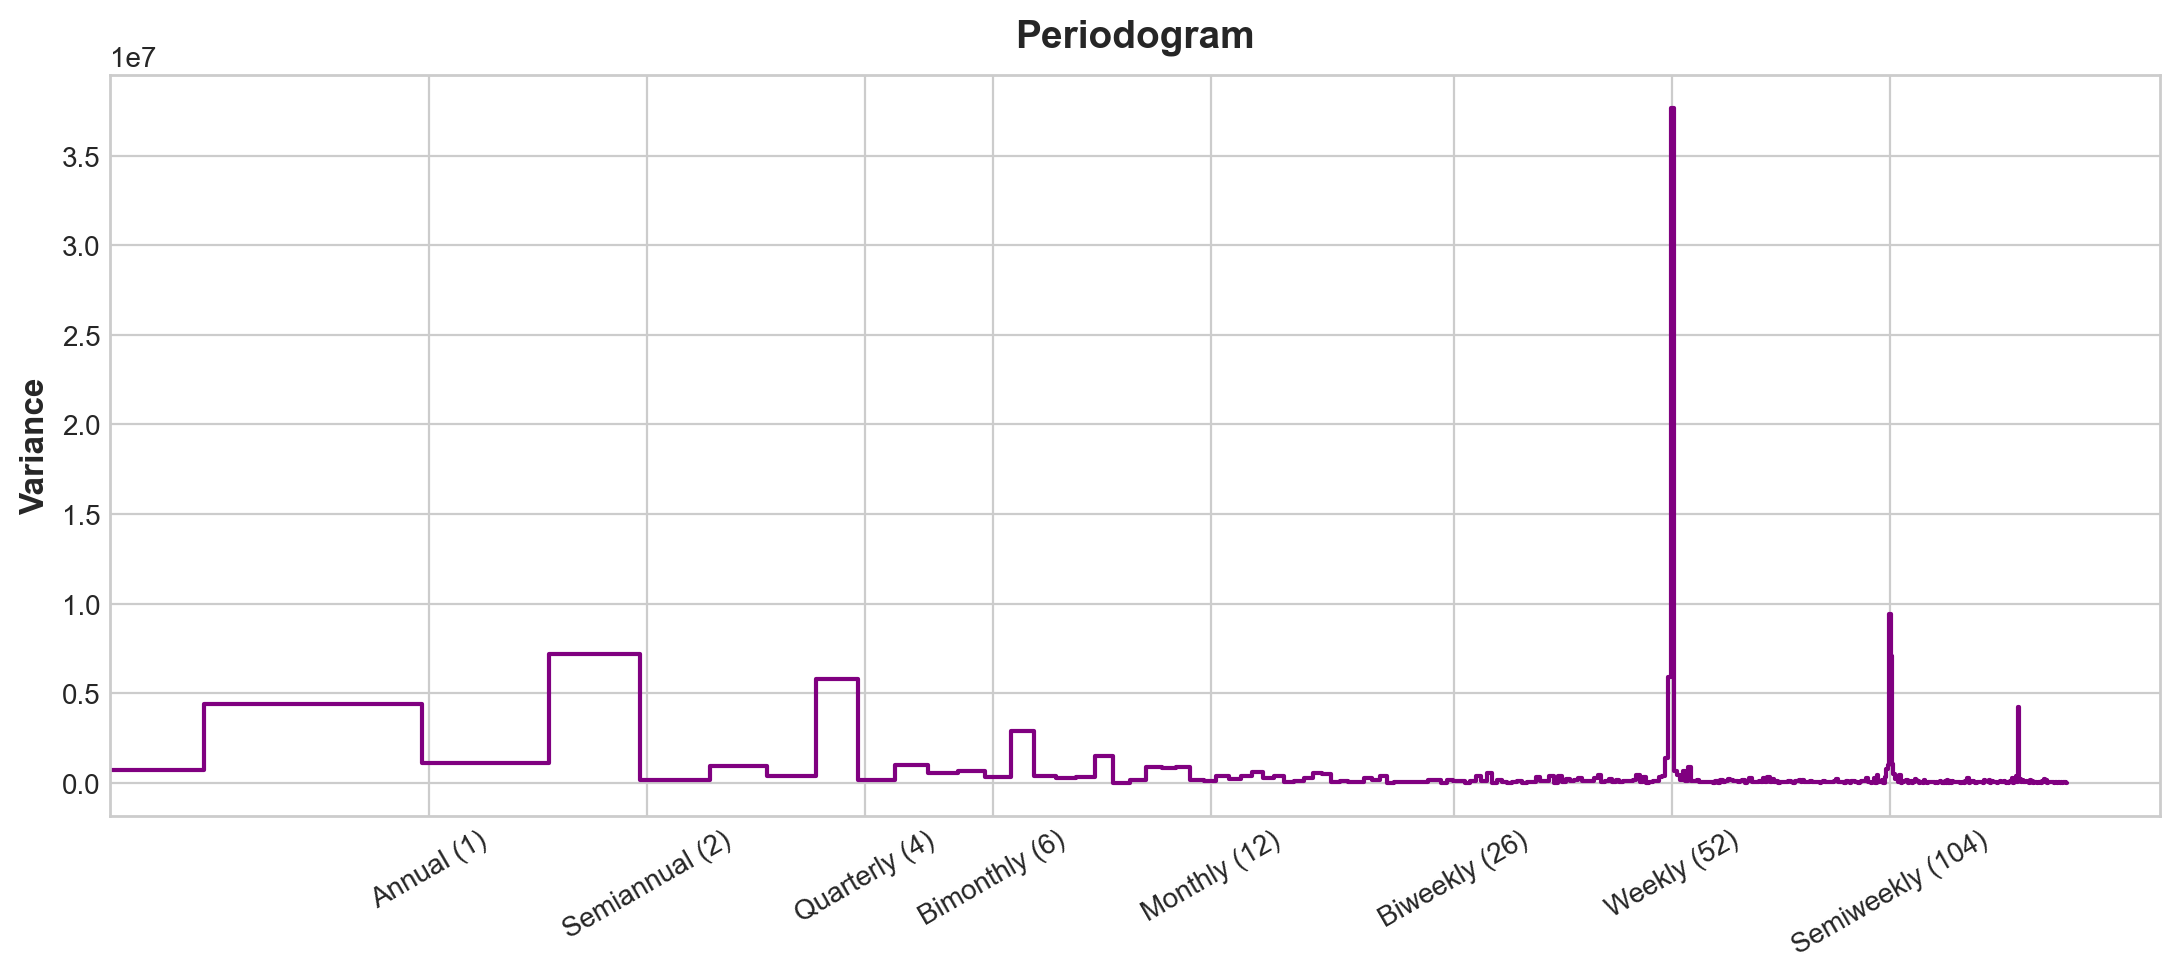

In [108]:
plot_periodogram(df.NumVehicles)

The periodogram agrees with the seasonal plots above: a strong weekly season and a weaker annual season. The weekly season we'll model with indicators and the annual season with Fourier features. From right to left, the periodogram falls off between Bimonthly (6) and Monthly (12), so let's use 10 Fourier pairs.

We'll create our seasonal features using DeterministicProcess, the same utility we used to create trend features. To use two seasonal periods (weekly and annual), we'll need to instantiate one of them as an "additional term":

In [109]:
fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=df.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

x = dp.in_sample()  # create features for dates in tunnel.index

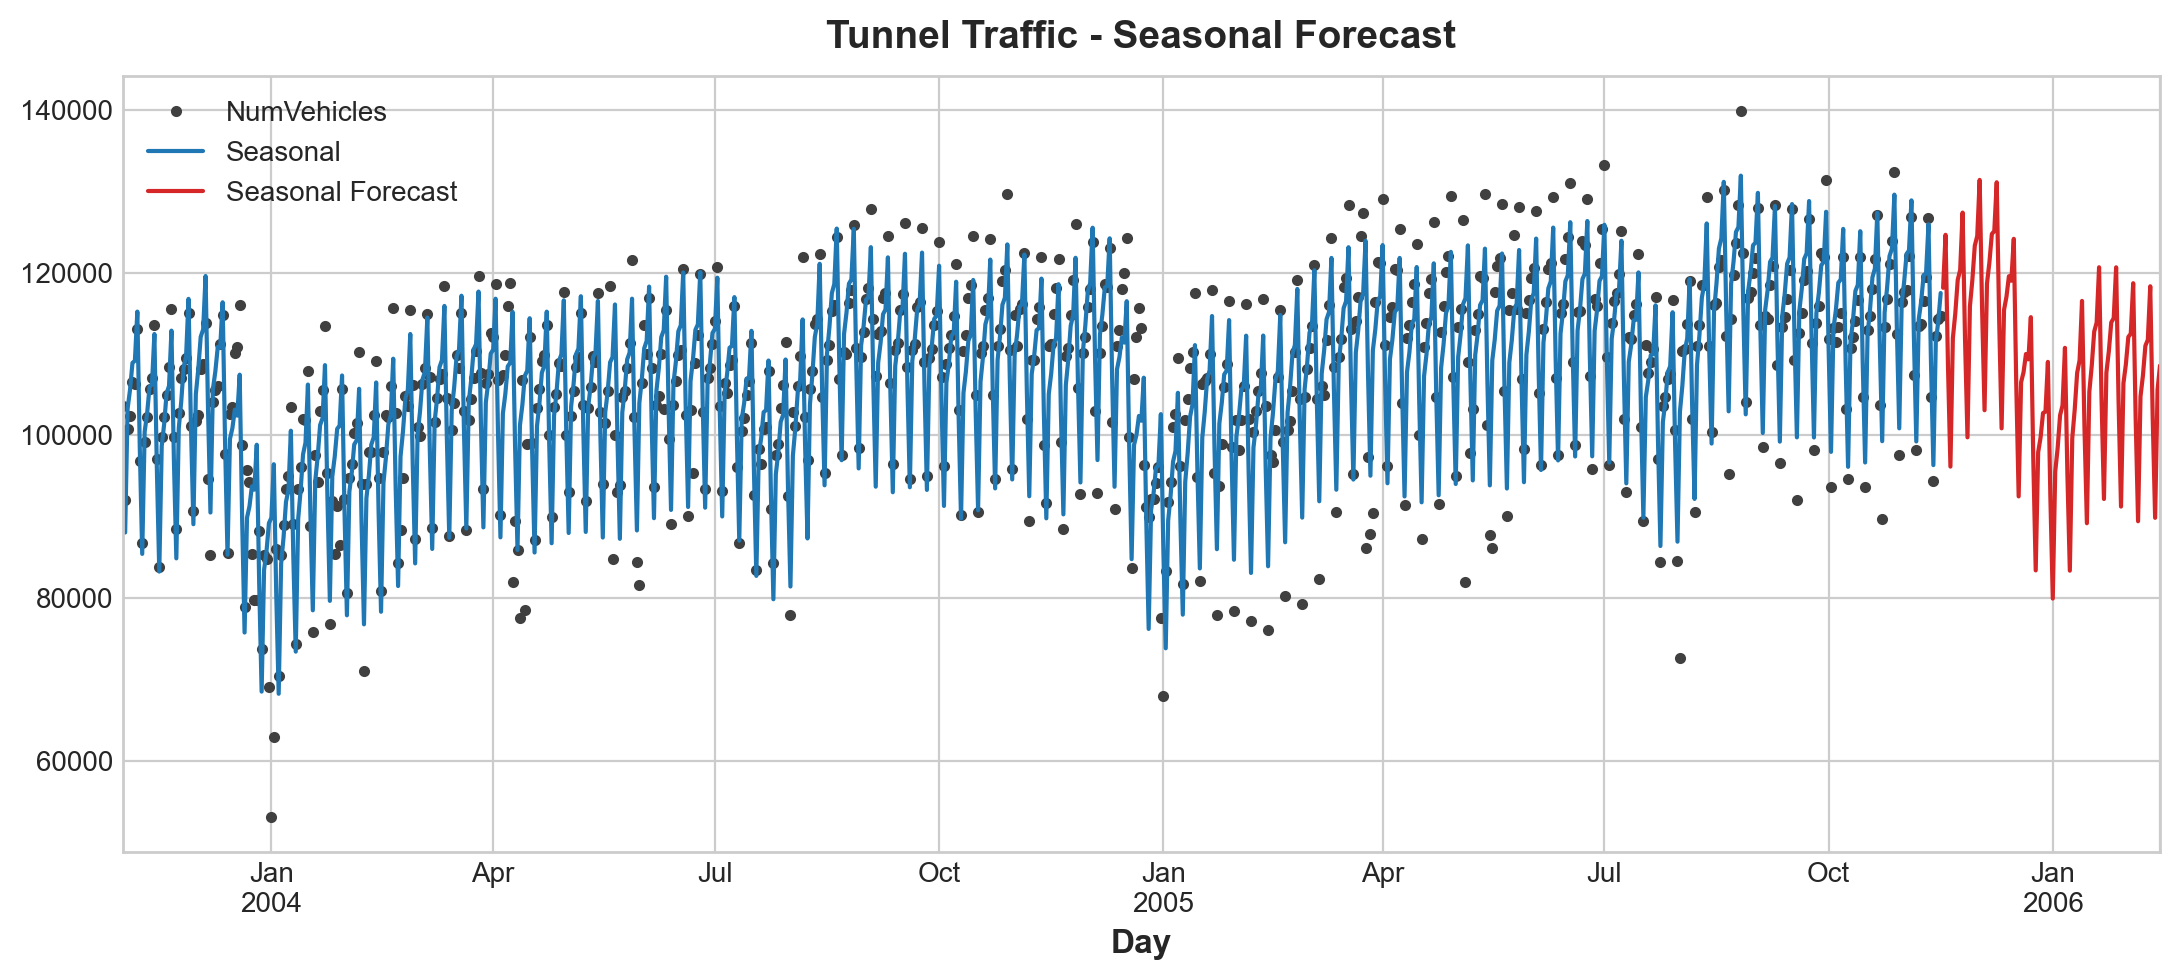

In [110]:
y = df["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(x, y)

y_pred = pd.Series(model.predict(x), index=y.index)
X_fore = dp.out_of_sample(steps=90) # 90 days forecast based on seasonally adjusted data
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

Time series as features. 

Some time series properties, however, can only be modeled as serially dependent properties, that is, using as features past values of the target series. One especially common way for serial dependence to manifest is in cycles. Cycles are patterns of growth and decay in a time series associated with how the value in a series at one time depends on values at previous times, but not necessarily on the time step itself. Cyclic behavior is characteristic of systems that can affect themselves or whose reactions persist over time. What distinguishes cyclic behavior from seasonality is that cycles are not necessarily time dependent, as seasons are. What happens in a cycle is less about the particular date of occurence, and more about what has happened in the recent past. The (at least relative) independence from time means that cyclic behavior can be much more irregular than seasonality.

To investigate possible serial dependence (like cycles) in a time series, we need to create "lagged" copies of the series. Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps. In either case, the effect is that the observations in the lagged series will appear to have happened later in time.

A lag plot of a time series shows its values plotted against its lags. Serial dependence in a time series will often become apparent by looking at a lag plot. The most commonly used measure of serial dependence is known as autocorrelation, which is simply the correlation a time series has with one of its lags. 

When choosing lags to use as features, it generally won't be useful to include every lag with a large autocorrelation. For instance, the autocorrelation at lag 2 might result entirely from "decayed" information from lag 1 -- just correlation that's carried over from the previous step. If lag 2 doesn't contain anything new, there would be no reason to include it if we already have lag 1.

The partial autocorrelation tells you the correlation of a lag accounting for all of the previous lags -- the amount of "new" correlation the lag contributes. Plotting the partial autocorrelation can help you choose which lag features to use. 

The difference between ACF and PACF is the inclusion or exclusion of indirect correlations in the calculation.

A blue area in the ACF and PACF plots, which depicts the 95% confidence interval and is in indicator for the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

A partial autocorrelation plot is known as a correlogram. The correlogram is for lag features essentially what the periodogram is for Fourier features.

In [111]:
df = pd.read_csv('data/flu-trends.csv')
df.set_index(
    pd.PeriodIndex(df.Week, freq="W"),
    inplace=True,
)
df.drop("Week", axis=1, inplace=True)

In [112]:
df.head(3)

,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,ColdVersusFlu,...,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
Week,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,8,...,16,6,13,25,34,30,25,24,15,180
2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,8,...,16,7,8,27,32,27,28,29,9,115
2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,8,...,16,6,9,24,28,25,25,25,9,132


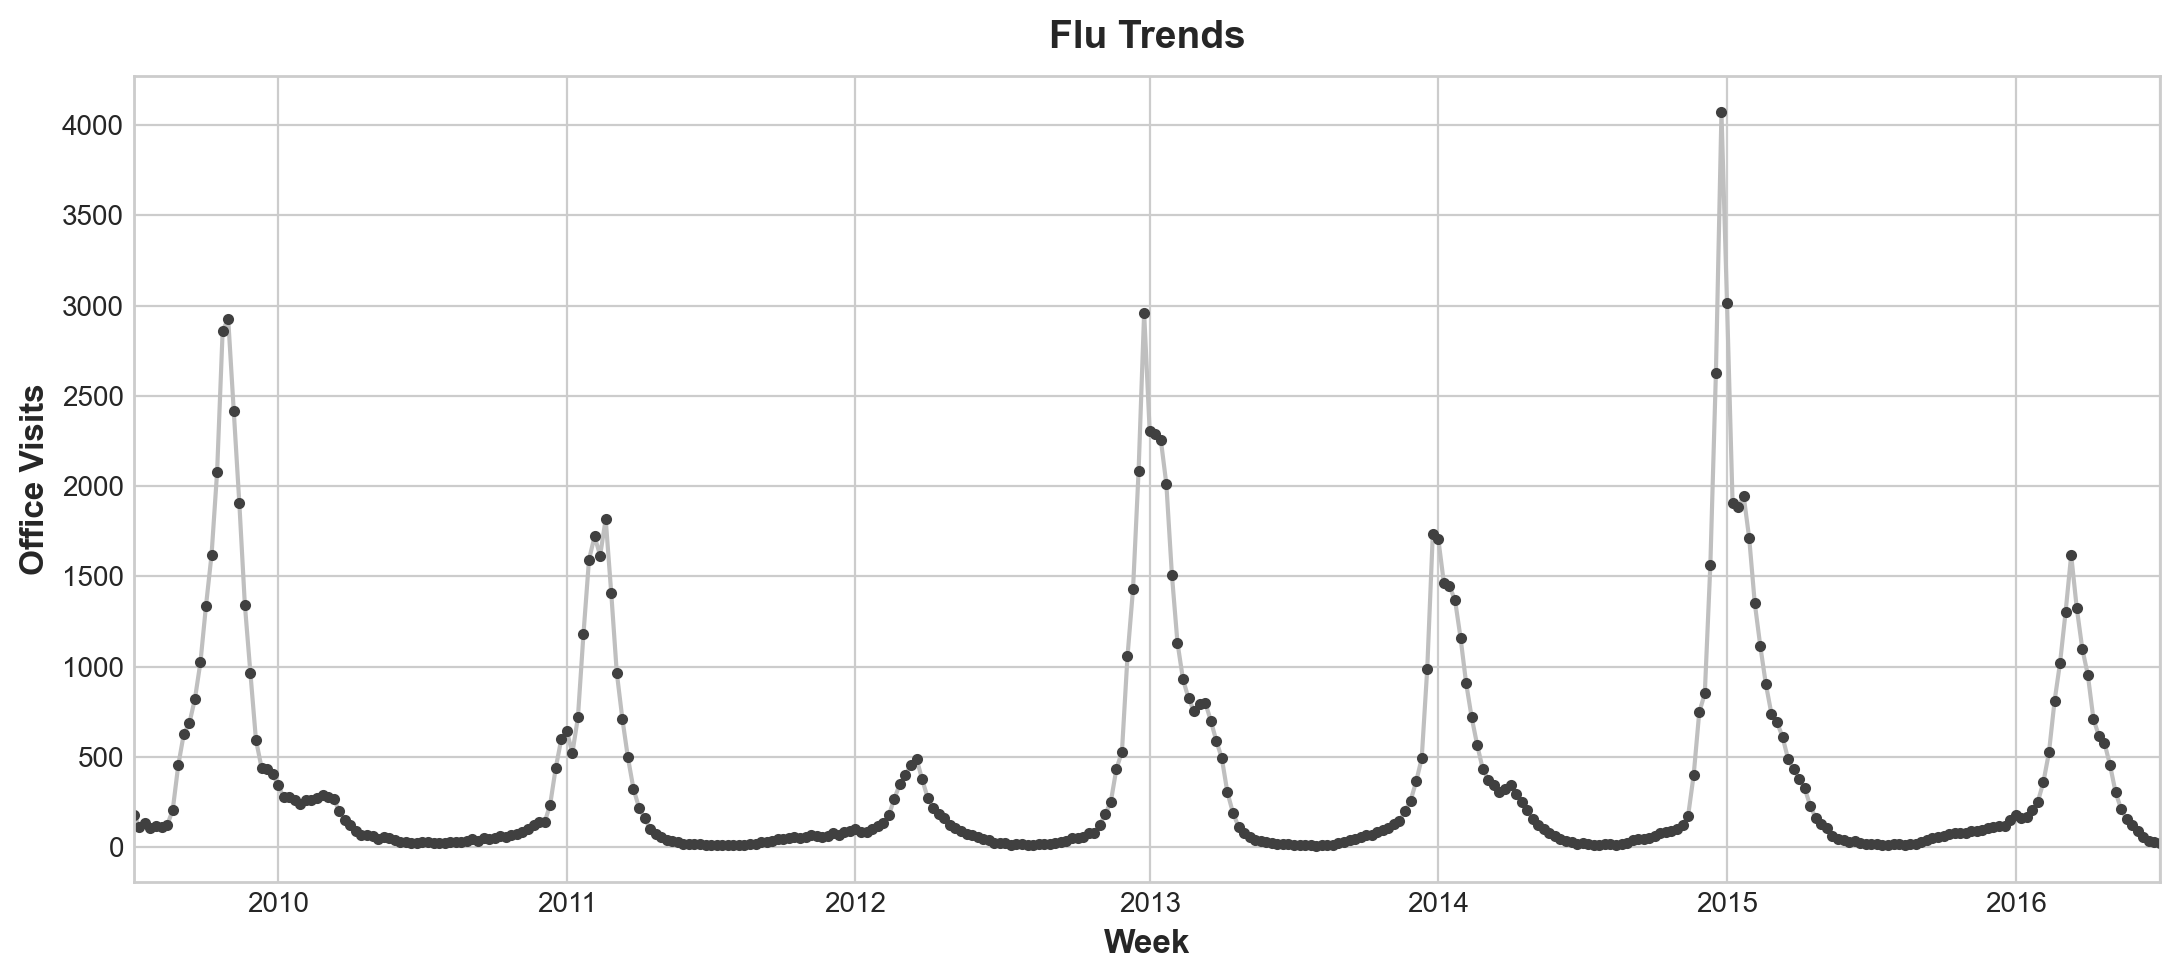

In [113]:
ax = df.FluVisits.plot(title='Flu Trends', **plot_params)
_ = ax.set(ylabel="Office Visits")

Тест Дики-Фуллера на стационарность: если p-value < 0.05 - ряд стационарен

для стационарности ряда требуются следующие условия: 
1) отсутствие сезонности
2) отсутствие тренда
3) +- одинаковая дисперсия на всем ряду  

If time series is non stationary, try to difference it

In [117]:
import statsmodels.api as sm
p = sm.tsa.stattools.adfuller(df.FluVisits)[1]
print(f'Критерий Дики-Фуллера: p-value={p:.4f}')

Критерий Дики-Фуллера: p-value=0.0000


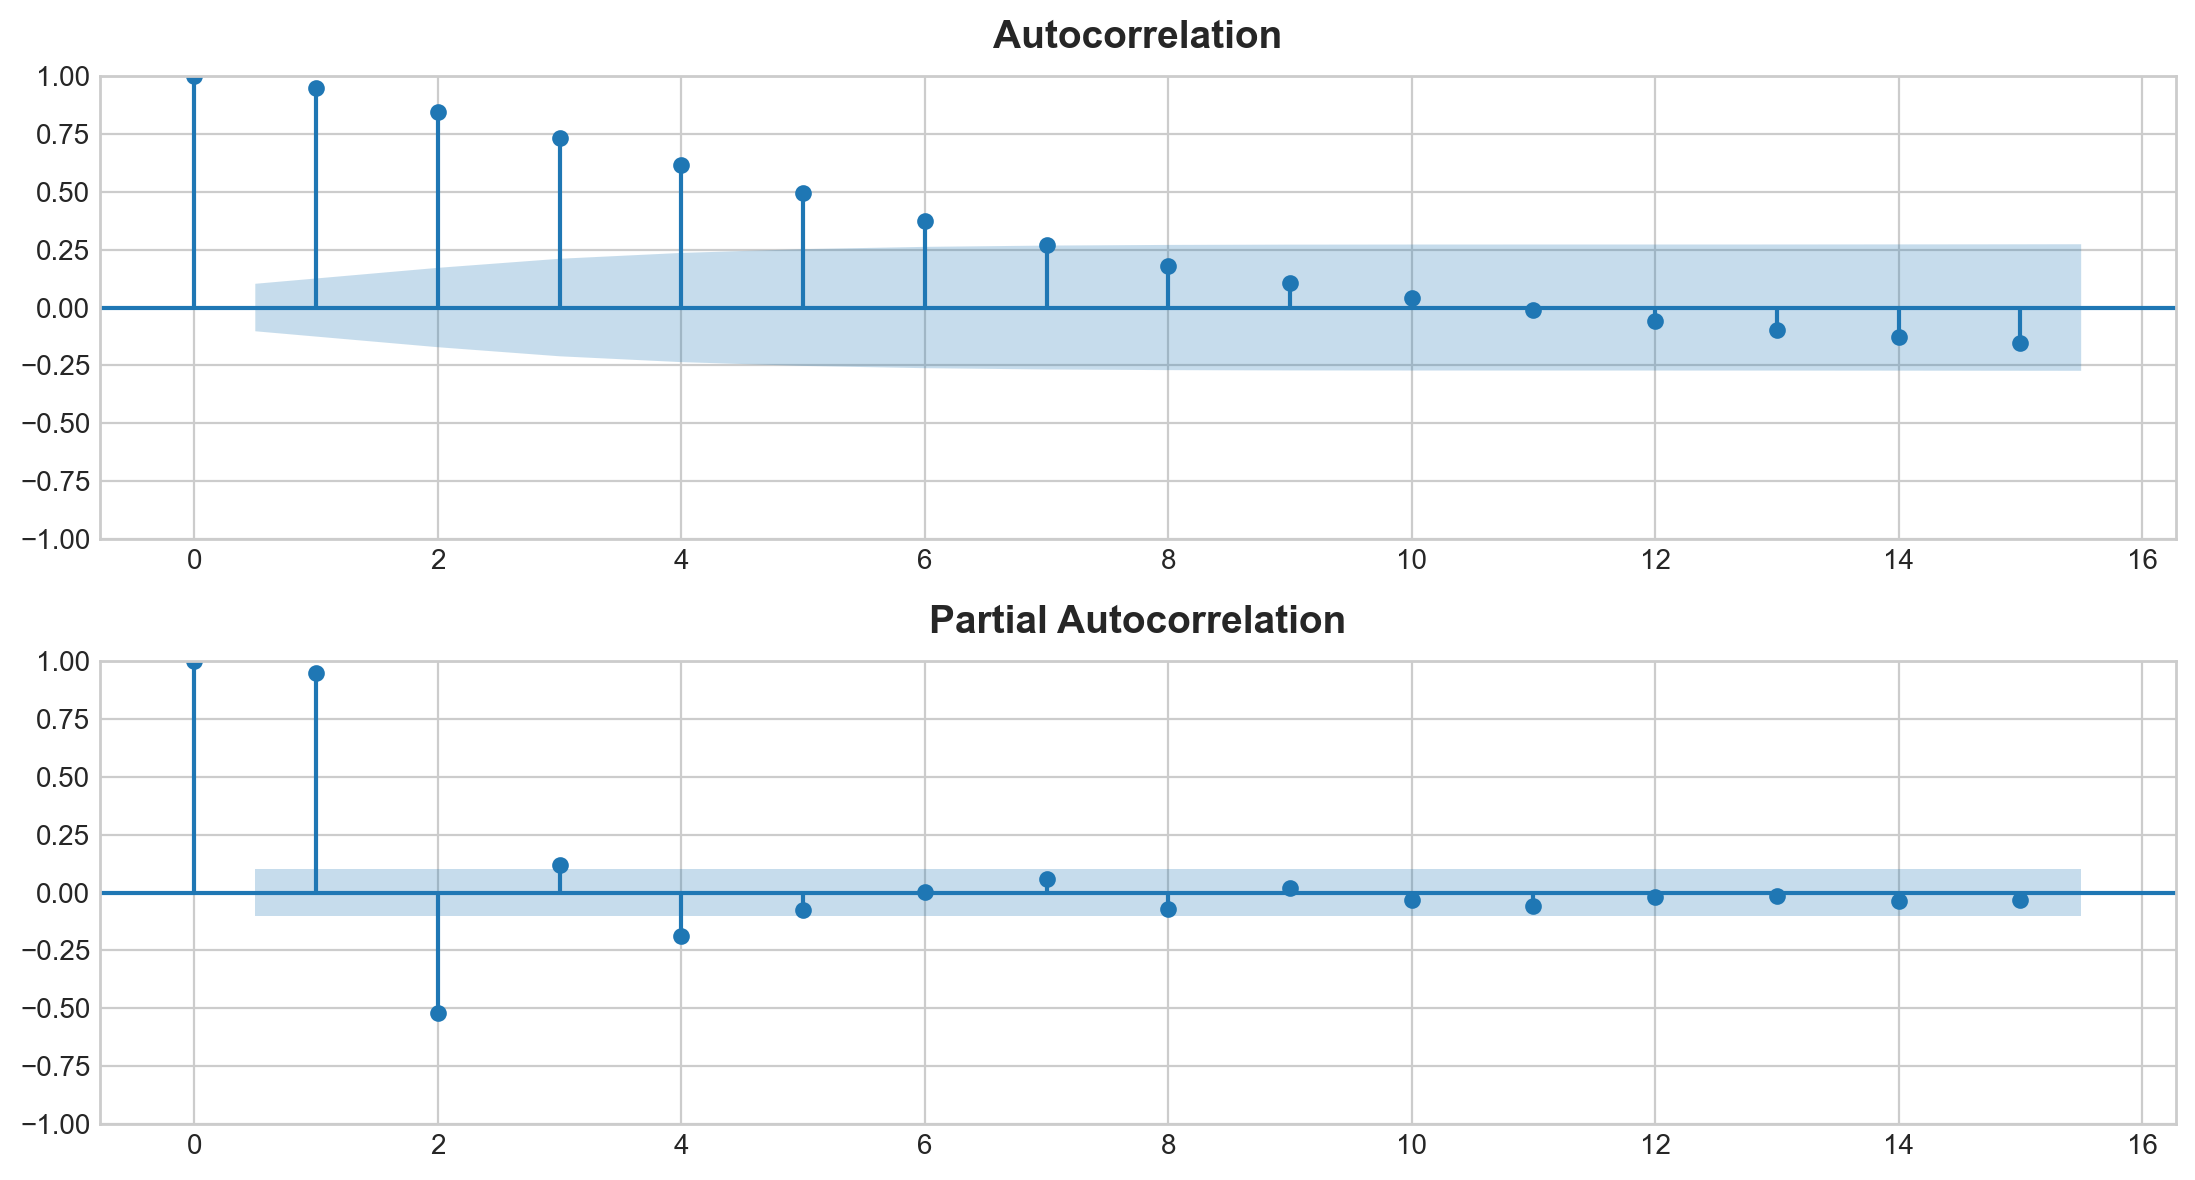

In [121]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(11, 6))
plot_acf(df['FluVisits'],lags=15, ax=ax[0])
plot_pacf(df['FluVisits'],lags=15, ax=ax[1], method='ols')
plt.show()

The partial autocorrelations suggest the dependence can be captured using lags 1, 2, 3, and 4.

In [123]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


x = make_lags(df.FluVisits, lags=4)
x = x.fillna(0.0)

In previous lessons, we were able to create forecasts for as many steps as we liked beyond the training data. When using lag features, however, we are limited to forecasting time steps whose lagged values are available.

In [125]:
from sklearn.model_selection import train_test_split
y = df.FluVisits.copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=60, shuffle=False)

In [126]:
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=pd.Series(model.predict(x_train), index = y_train.index)
y_fore = pd.Series(model.predict(x_test), index = y_test.index)

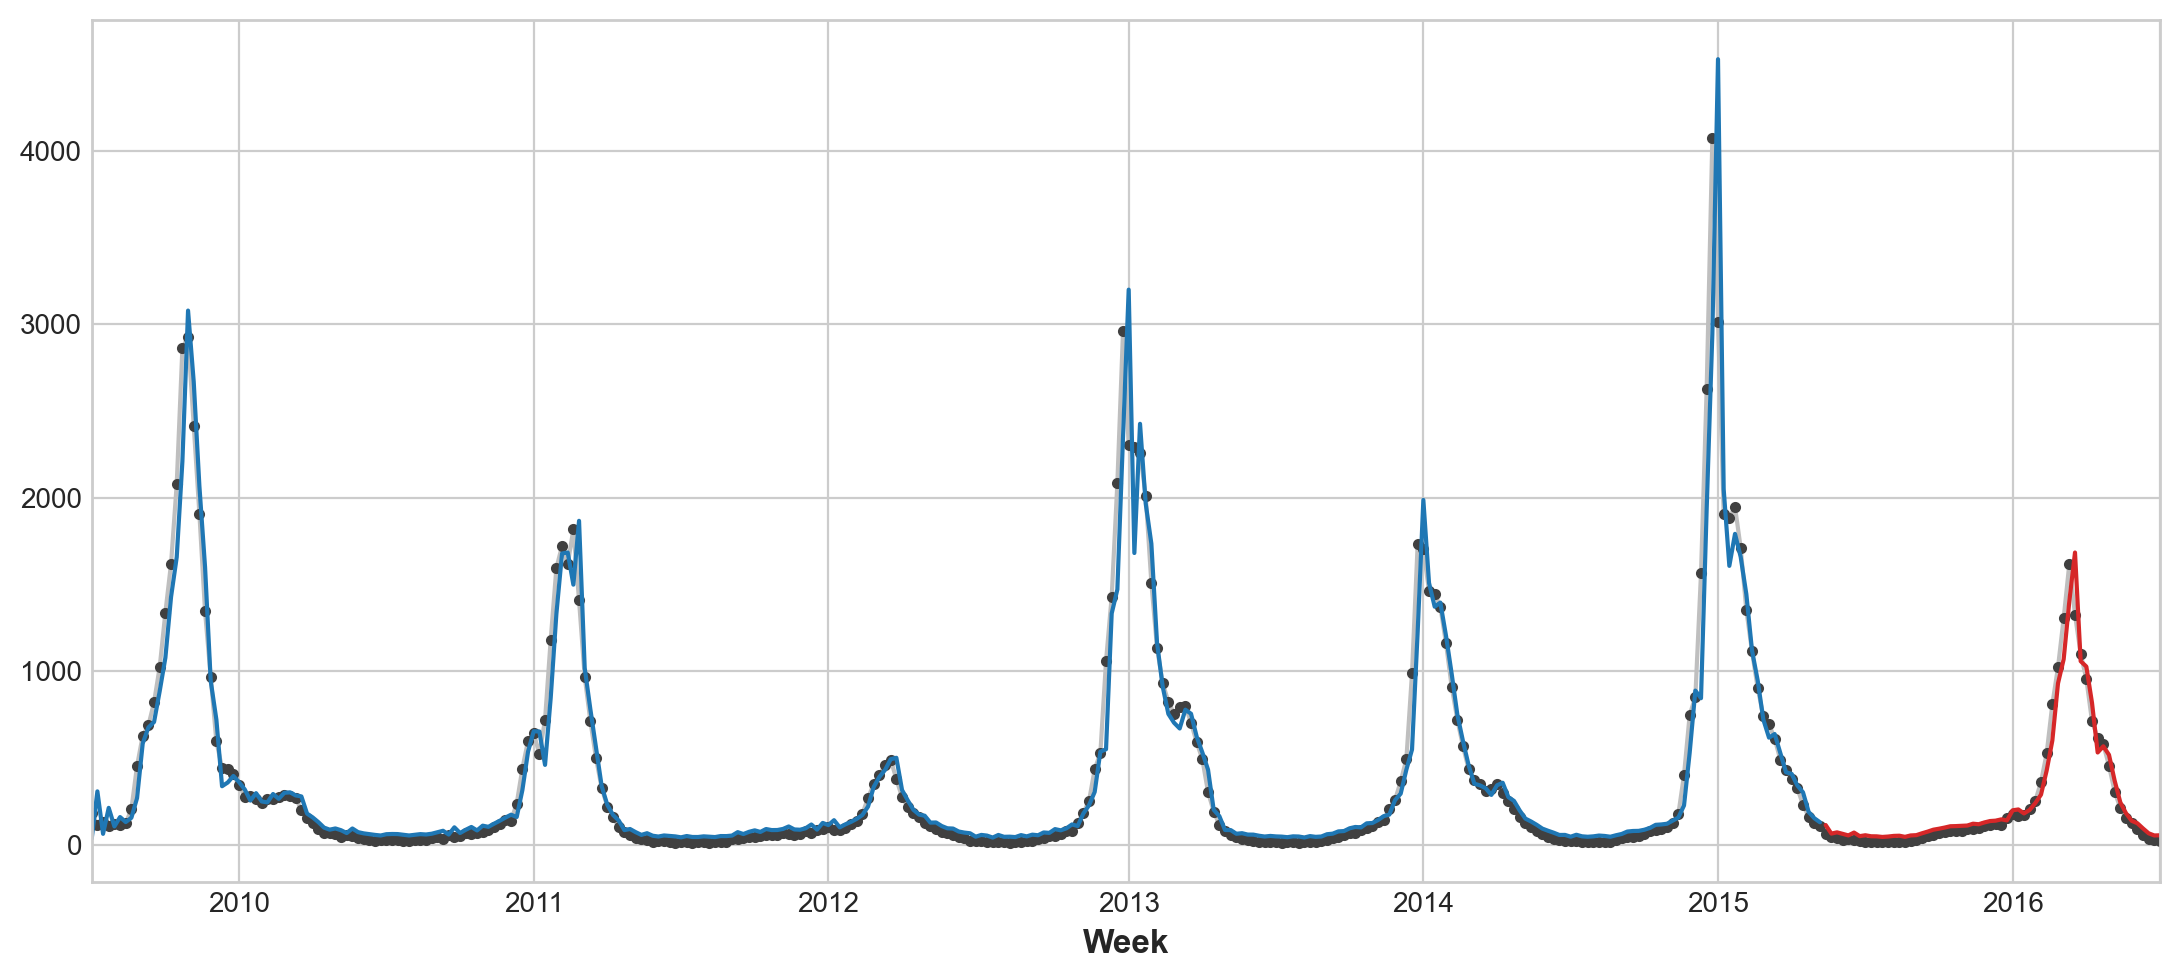

In [127]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

Looking just at the forecast values, we can see how our model needs a time step to react to sudden changes in the target series. This is a common limitation of models using only lags of the target series as features.

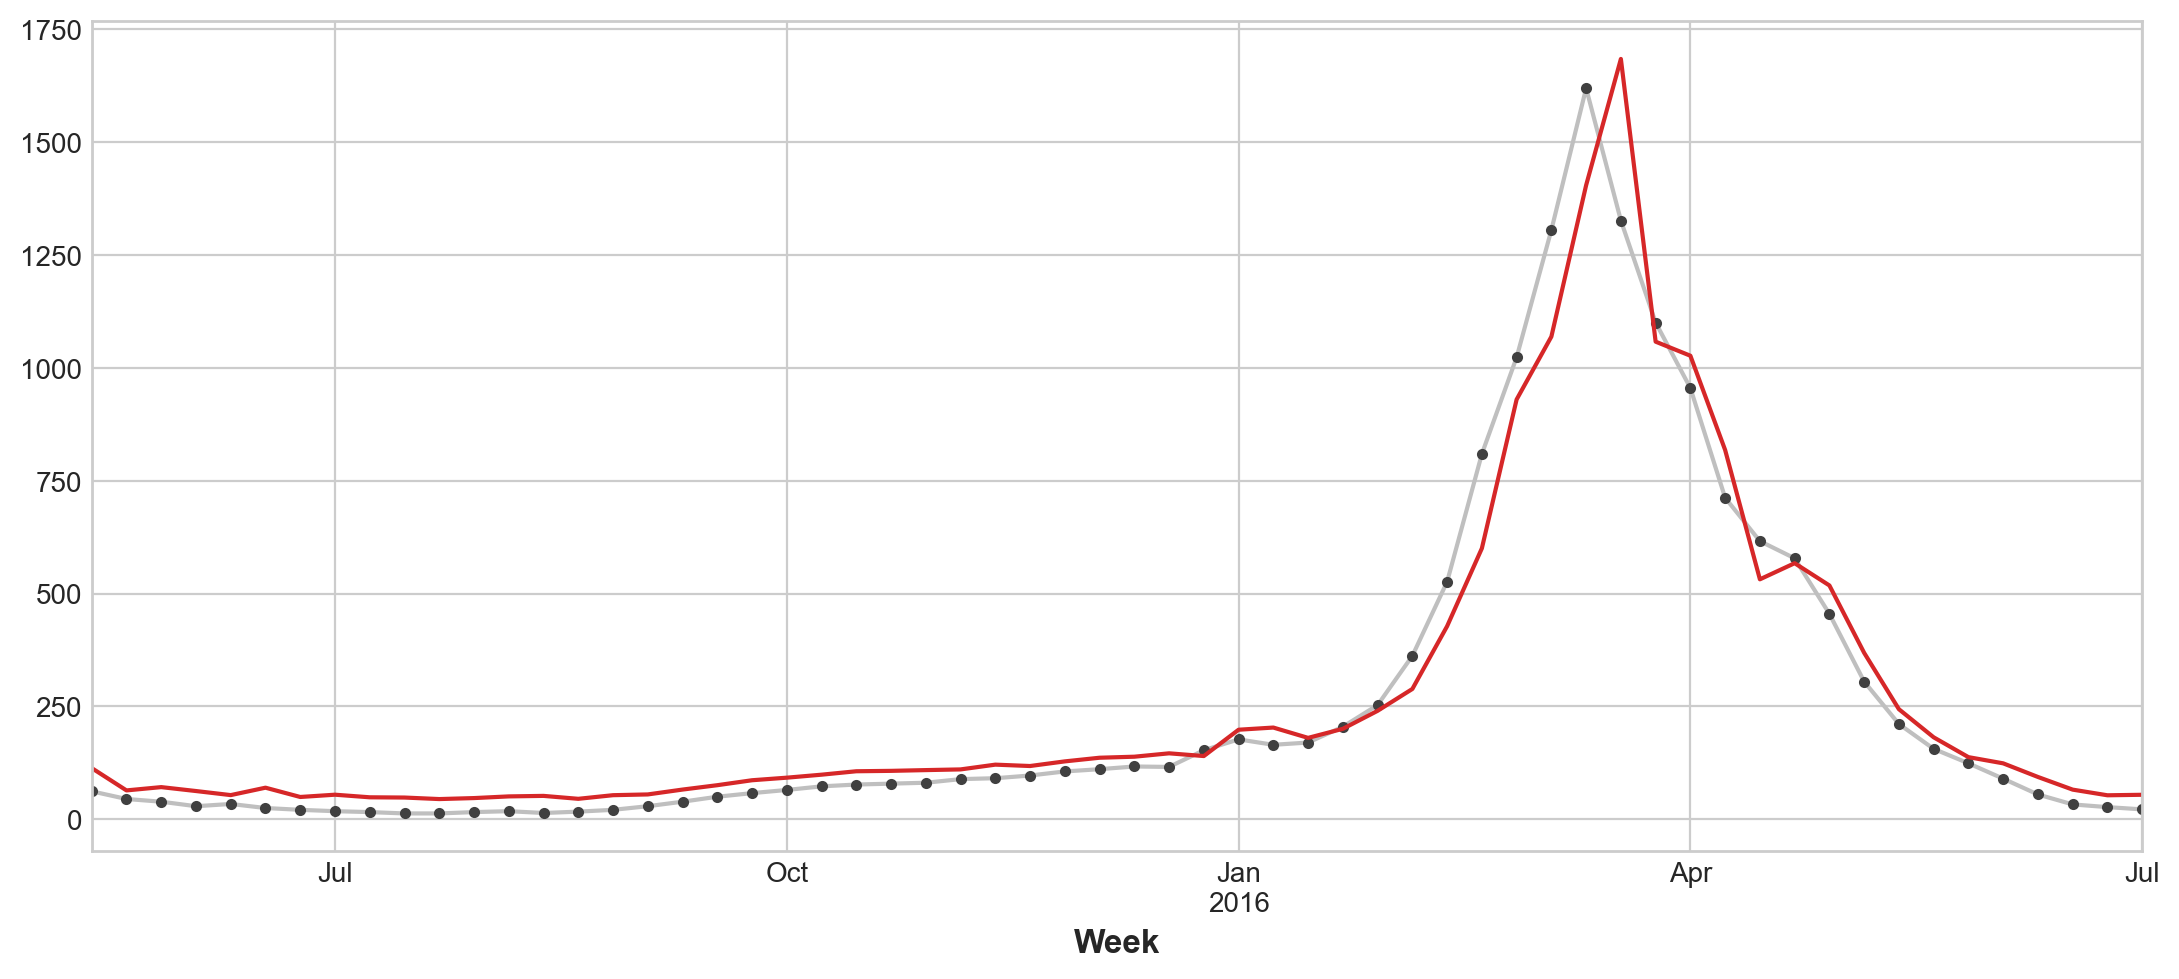

In [128]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

To improve the forecast we could try to find leading indicators, time series that could provide an "early warning" for changes in flu cases. For our second approach then we'll add to our training data the popularity of some flu-related search terms as measured by Google Trends.

Plotting the search phrase 'FluCough' against the target 'FluVisits' suggests such search terms could be useful as leading indicators: flu-related searches tend to become more popular in the weeks prior to office visits.

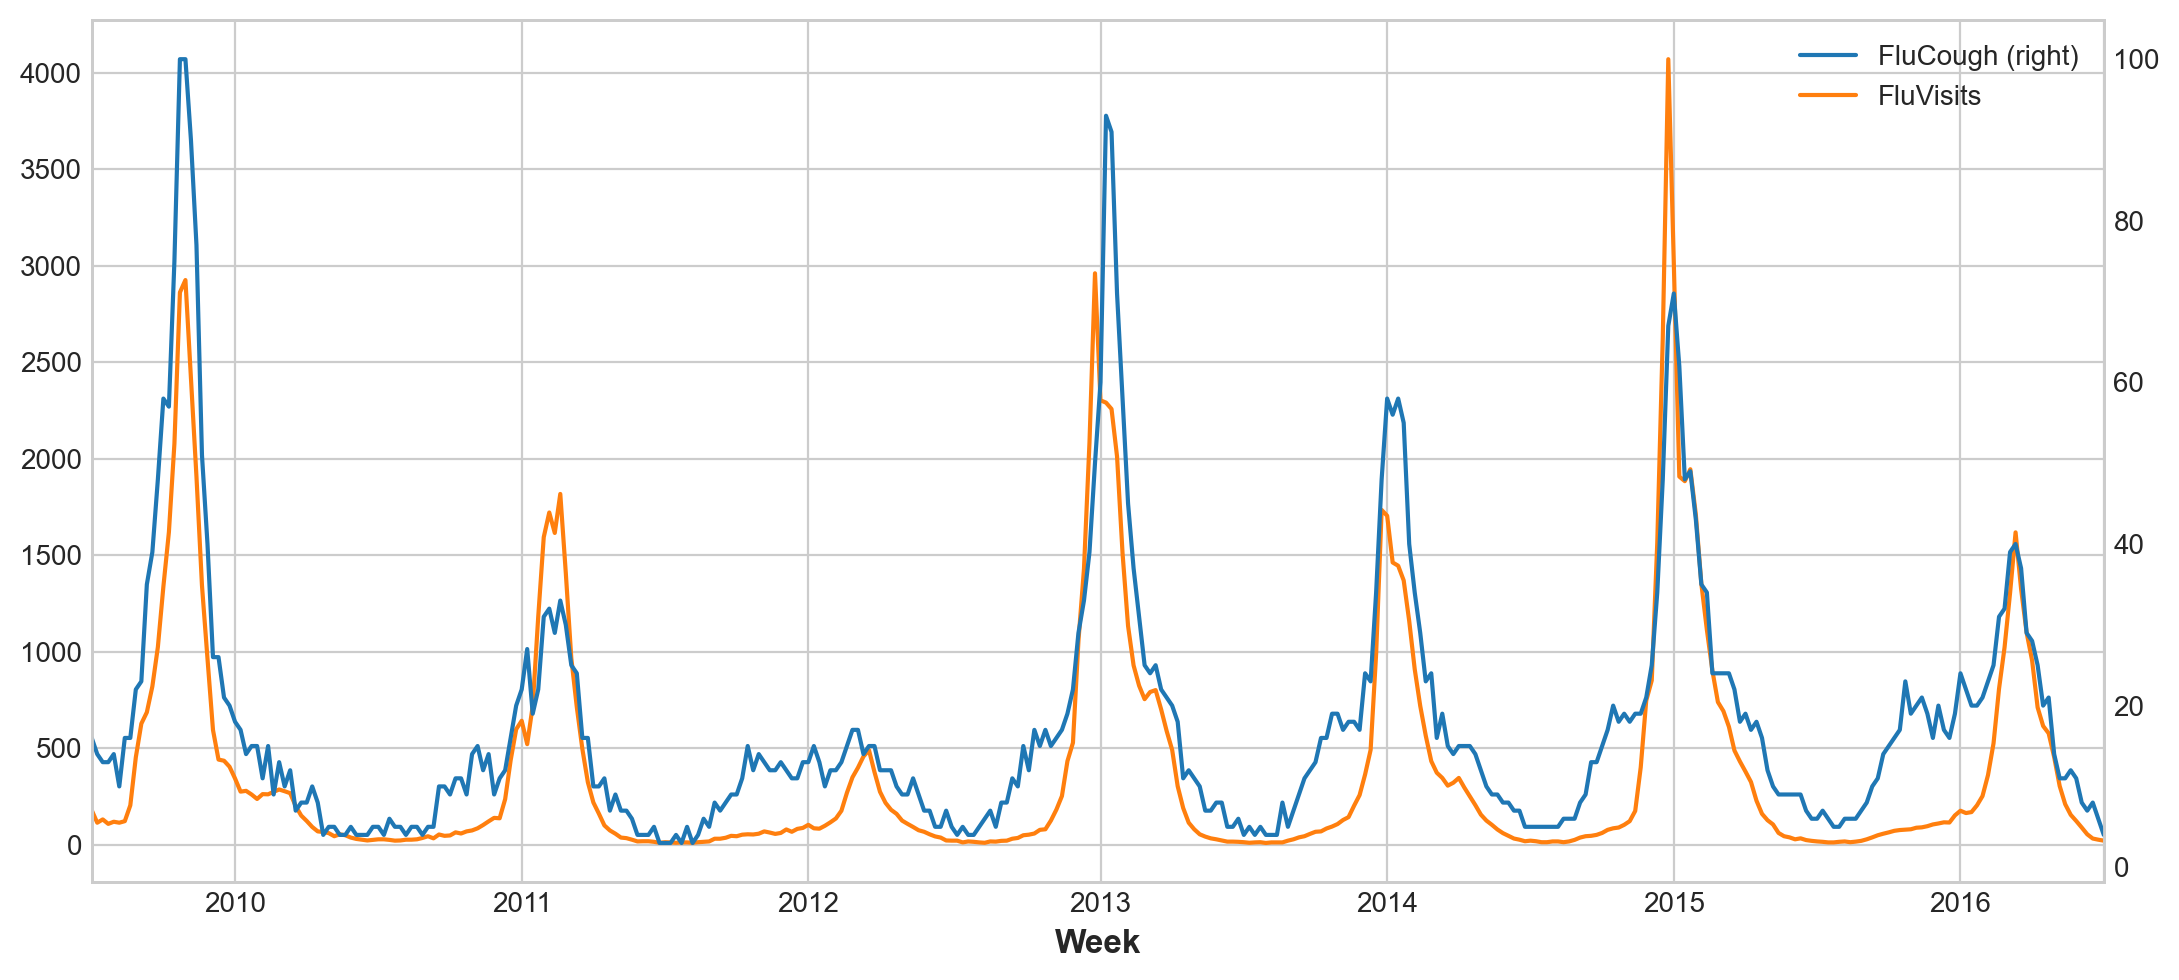

In [129]:
ax = df.plot(
    y=["FluCough", "FluVisits"],
    secondary_y="FluCough",
)

In [130]:
search_terms = ["FluContagious", "FluCough", "FluFever", "InfluenzaA", "TreatFlu", "IHaveTheFlu", "OverTheCounterFlu", "HowLongFlu"]

# Create three lags for each search term
X0 = make_lags(df[search_terms], lags=3)
X0.columns = [' '.join(col).strip() for col in X0.columns.values]

# Create four lags for the target, as before
X1 = make_lags(df['FluVisits'], lags=4)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

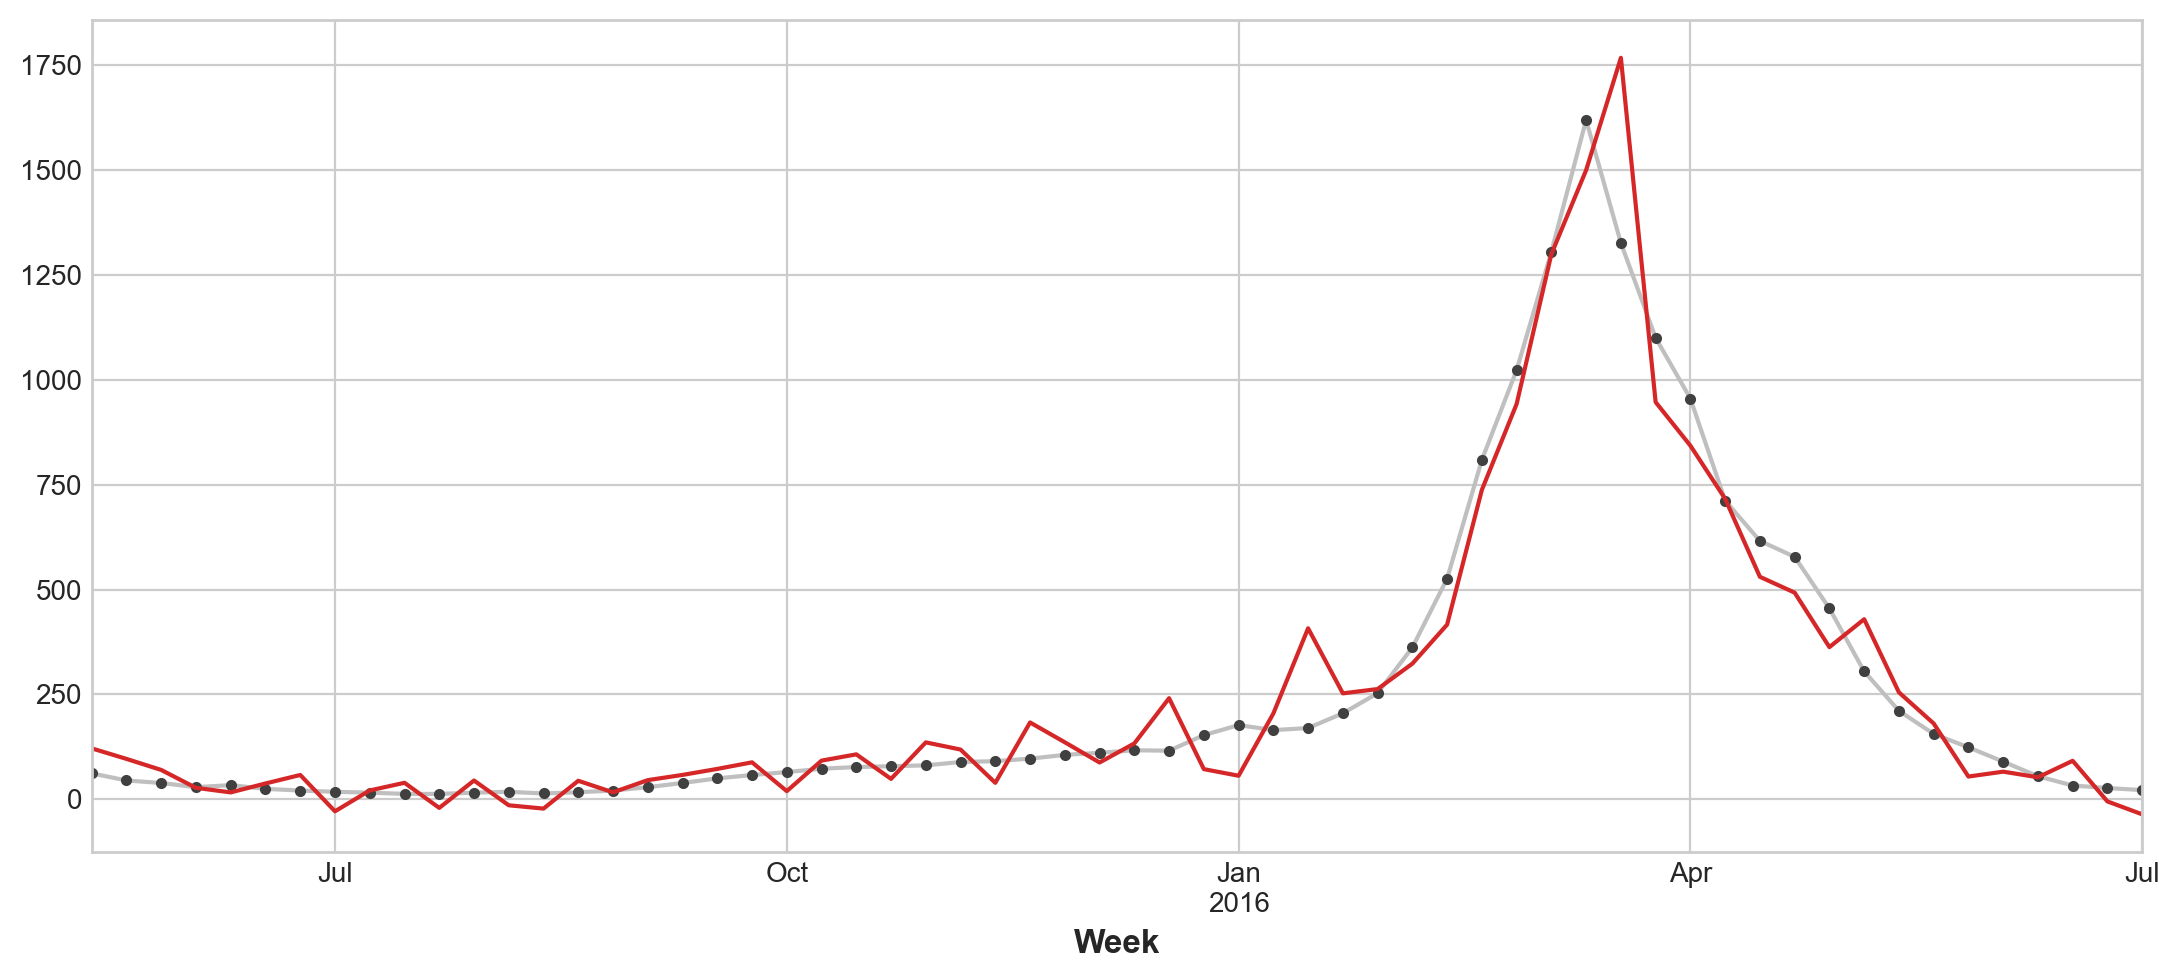

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')